# DDoS attacks detection and characterization

First, we need to import the necessary libraries.

In [71]:
# import needed python libraries

%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import colorcet as cc
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score, silhouette_samples

## Unsupervised learning - classification
Now we load the transformed dataset from the csv we created in the previous jupyter notebook.

In [72]:
# Load the dataset
df = pd.read_csv("preprocessed_dataset.csv", header=0, index_col=0, engine='python')

df

,Source IP,Source Port,Destination Port,Total Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Fwd IAT Min,...,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,Active Max,Active Min,Idle Std,Idle Min,Inbound,protocol_0,label
0,-0.036507,-0.996890,1.463534,0.169121,-0.297075,-0.172277,-0.069596,-0.146261,-0.765426,-0.014034,...,-0.266314,-0.102881,1.765456,-0.044084,-0.037205,-0.165955,-0.194882,0.295752,-0.030062,ddos_dns
1,1.464073,-0.996890,1.463534,-0.036372,-0.297075,-0.172277,-0.069596,-0.146261,-0.324952,-0.014030,...,-0.266314,-0.102881,-0.265447,-0.044084,-0.037205,-0.165955,-0.194882,-3.381206,-0.030062,ddos_dns
2,-0.036507,-0.996890,0.770389,0.391920,-0.297075,-0.172277,-0.069596,-0.146261,-0.765114,-0.014034,...,-0.266314,-0.102881,3.967382,-0.044084,-0.037205,-0.165955,-0.194882,0.295752,-0.030062,ddos_dns
3,-0.036507,-0.996890,-0.924976,0.391920,-0.297075,-0.172277,-0.069596,-0.146261,-0.765106,-0.014034,...,-0.266314,-0.102881,3.967382,-0.044084,-0.037205,-0.165955,-0.194882,0.295752,-0.030062,ddos_dns
4,-0.036507,-0.996890,-0.139438,0.391920,-0.297075,-0.172277,-0.069596,-0.146261,-0.764174,-0.014038,...,-0.266314,-0.102881,3.967382,-0.044084,-0.037205,-0.165955,-0.194882,0.295752,-0.030062,ddos_dns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65995,-0.036507,0.540571,1.589149,-0.036372,-0.408056,-0.172277,-0.069596,-0.146261,-0.013555,-0.014034,...,-0.266314,-0.102881,-0.265447,-0.044084,-0.037205,-0.165955,-0.194882,0.295752,-0.030062,ddos_udp_lag
65996,-0.036507,1.350236,-0.577568,-0.027720,-0.377323,0.521580,-0.069596,-0.146261,-0.766925,-0.014034,...,-0.266314,-0.102881,-0.179935,-0.044084,-0.037205,-0.165955,-0.194882,0.295752,-0.030062,ddos_udp_lag
65997,-0.036507,0.843239,1.670387,-0.036372,-0.408056,-0.172277,-0.069596,-0.146261,-0.013555,-0.014034,...,-0.266314,-0.102881,-0.265447,-0.044084,-0.037205,-0.165955,-0.194882,0.295752,-0.030062,ddos_udp_lag
65998,-0.036507,1.433360,-0.996433,-0.032046,-0.384152,0.501315,-0.069596,-0.146261,-0.766921,-0.014034,...,-0.266314,-0.102881,-0.222691,-0.044084,-0.037205,-0.165955,-0.194882,0.295752,-0.030062,ddos_udp_lag


In [73]:
X = df.drop(columns = 'label').to_numpy()
y = df['label'].values

In [74]:
#2D PCA
pca = PCA(n_components=2)
projection = pca.fit_transform(X)
projection = pd.DataFrame(projection)

## K-means
**k-Means** is a hard clustering approach (each sample is associated with one and only one cluster), that partitions m observations to k clusters in which each observation belongs to the cluster with the nearest mean (cluster centroid).
Reference link: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans">K-means in sklearn</a>.

Regarding the ``init`` hyper-parameter, we leave the default option *k-means++* because it will make it so that the centroids will be equally distant from each other, thus provably leading to better results.  

In [4]:
# k-means
# k-Means with n_clusters = 12, which is the number of labels
kmeans = KMeans(n_clusters=12)
# Fits the k-means algorithm to the dataset X and Predicts cluster labels for each data point
cl_labels12 = kmeans.fit_predict(X) 

# Unsupervised metric
silhouette  = silhouette_score(X, cl_labels12)
# Supervised metrics
ri = rand_score(np.ravel(y), cl_labels12)
ari = adjusted_rand_score(np.ravel(y), cl_labels12)

print('k-Means with 12 clusters')
(unique, counts)=np.unique( cl_labels12, return_counts=True)
print("Size of each cluster: ", counts)
print(f'k_means clustering error: {round(kmeans.inertia_, 2)}')
print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')

k-Means with 12 clusters
Size of each cluster:  [ 1107 18710 10952 15237  8909   638    27  4443    54  4083    38    41]
k_means clustering error: 884145.77
Silhouette: 0.33
RI: 0.85
ARI: 0.41


The silhouette ranges between -1 and 1, where 1 indicates that the object is well matched with its own cluster and poorly matched to the others, while scores around zero indicates overlapping clusters.

We want to understand which is the optimal ``n_init`` to use in terms of the clustering error and, particularly, the silhoutte. We already know that the clustering error favours an higher number: by increasing the number of clusters the average distance from the points to the corresponding cluster means (which defines the clustering error) can not decrease.

In [5]:
n_cluster_list=[]
shs_list = []
ri_list = []
ari_list = []
inertia_list=[]

In [6]:

for n_clusters in range(10, 40):
    kmeans = KMeans(n_clusters=n_clusters)
    cl_labels = kmeans.fit_predict(X)
    # Unsupervised metric
    silhouette  = silhouette_score(X, cl_labels)
    n_cluster_list.append(n_clusters)
    shs_list.append(silhouette)
    ri_list.append(rand_score(np.ravel(y), cl_labels))
    ari_list.append(adjusted_rand_score(np.ravel(y), cl_labels))
    inertia_list.append(kmeans.inertia_)
    print(f"{n_clusters} clusters: clustering_error {round(kmeans.inertia_, 2)}, silhouette {round(silhouette, 2)}")

10 clusters: clustering_error 1040244.31, silhouette 0.37
11 clusters: clustering_error 948594.15, silhouette 0.36
12 clusters: clustering_error 876067.48, silhouette 0.35
13 clusters: clustering_error 864300.53, silhouette 0.38
14 clusters: clustering_error 841740.05, silhouette 0.36
15 clusters: clustering_error 744221.68, silhouette 0.39
16 clusters: clustering_error 706150.08, silhouette 0.39
17 clusters: clustering_error 609595.13, silhouette 0.39
18 clusters: clustering_error 622900.37, silhouette 0.4
19 clusters: clustering_error 553908.61, silhouette 0.37
20 clusters: clustering_error 496869.79, silhouette 0.42
21 clusters: clustering_error 518094.52, silhouette 0.41
22 clusters: clustering_error 458763.0, silhouette 0.42
23 clusters: clustering_error 472183.42, silhouette 0.41
24 clusters: clustering_error 437240.82, silhouette 0.39
25 clusters: clustering_error 361126.4, silhouette 0.43
26 clusters: clustering_error 368464.62, silhouette 0.44
27 clusters: clustering_error 370

best k:  34  with corresponding silhouette:  0.4541468680216116


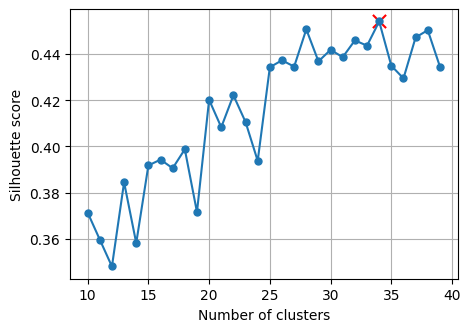

In [12]:
# Get n_clusters leading to the highest silhouette
best_sh= np.max(shs_list)
best_n=n_cluster_list[np.argmax(shs_list)]
print("best k: ",best_n, " with corresponding silhouette: ", best_sh)

# Plot
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,shs_list, marker='o', markersize=5)
plt.scatter(best_n, best_sh, color='r', marker='x', s=90)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

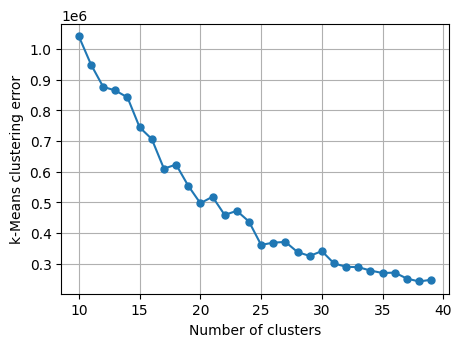

In [13]:
# Plot k-Means clustering error
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,inertia_list, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('k-Means clustering error')
plt.show()

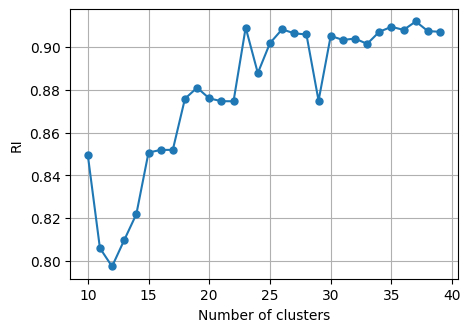

In [14]:
# Plot RI
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,ri_list, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('RI')
plt.show()

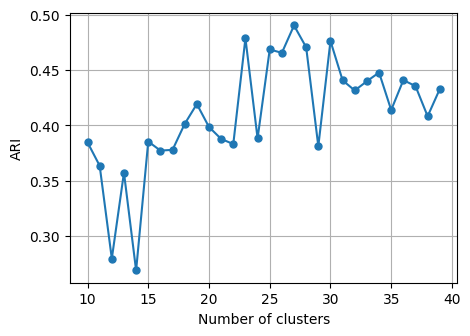

In [15]:
# Plot ARI
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,ari_list, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('ARI')
plt.show()

In [111]:
#cella di test
best_n=34

In [114]:
# k-means
# k-Means with n_clusters = best_n, which is the number of labels
kmeans = KMeans(n_clusters=best_n)
# Fits the k-means algorithm to the dataset X and Predicts cluster labels for each data point
cl_labels = kmeans.fit_predict(X) 

# Unsupervised metric
silhouette  = silhouette_score(X, cl_labels)
# Supervised metrics
ri = rand_score(np.ravel(y), cl_labels)
ari = adjusted_rand_score(np.ravel(y), cl_labels)

print(f'k-Means with {best_n} clusters')
(unique, counts)=np.unique( cl_labels, return_counts=True)
print("Size of each cluster: ", counts)
print(f'k_means clustering error: {round(kmeans.inertia_, 2)}')
print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')

k-Means with 34 clusters
Size of each cluster:  [  300 15172  5451  4911  1773    27  4082   488   503  1799    52   597
    38   909     1    35   163    29  4484     2  4455  8660  5050   240
   161     2     6    69   472     3   609  3218     6   472]
k_means clustering error: 281262.92
Silhouette: 0.45
RI: 0.88
ARI: 0.34


Now we want to analyse the clusters.
Let's reduce the feature dimensionality with a 2-component PCA and get the scatter plots of the samples on the 2-components which explain the majority of variance in the data.
We will show three plots:

        1. K-Means with 12 clusters
        2. Best K-Means clusters found in the previous analysis       
        3. Original labels


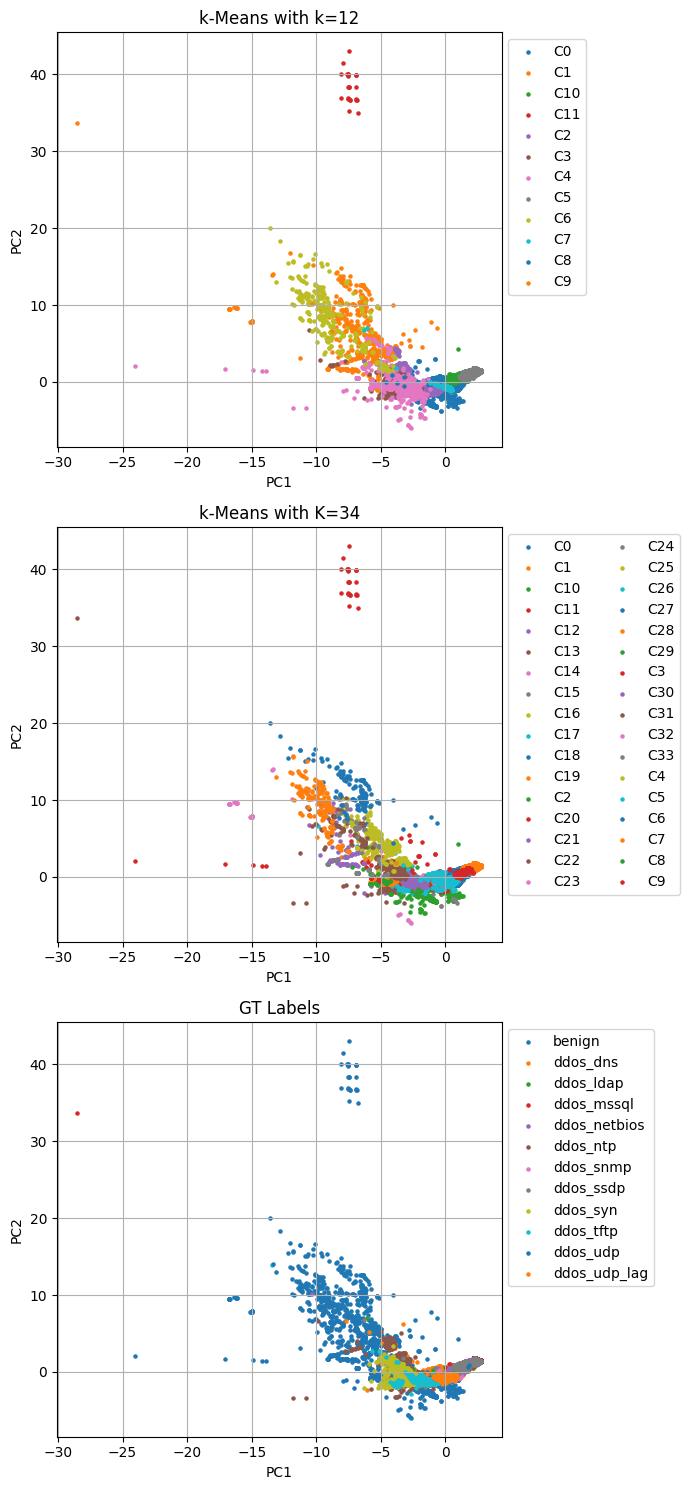

In [76]:
#running again k-Means with k=12 and best k to save the labels
kmeans = KMeans(n_clusters=best_n)
cl_labels = kmeans.fit_predict(X)
kmeans12 = KMeans(n_clusters=12)
cl_labels12 = kmeans12.fit_predict(X)

# Assign the cluster labels to the projection DataFrame
projection['cid3_KM'] = [f'C{x}' for x in cl_labels12]
projection['cidBest_KM'] = [f'C{x}' for x in cl_labels]
projection['label'] = y.reshape(-1)

fig, axs = plt.subplots(3, 1, figsize=(7, 15))

# Each cluster is plotter separately with a unique color
for i in np.unique(projection.cid3_KM):
    subdf = projection[projection.cid3_KM==i]
    axs[0].scatter(subdf[0], subdf[1], label=i, s=5)
axs[0].grid()
lgnd = axs[0].legend(bbox_to_anchor=(1, 1), loc="upper left")
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')
axs[0].set_title('k-Means with k=12')
    
for i in np.unique(projection.cidBest_KM):
    subdf = projection[projection.cidBest_KM==i]
    axs[1].scatter(subdf[0], subdf[1], label=i, s=5)
axs[1].grid()
lgnd = axs[1].legend(bbox_to_anchor=(1, 1), loc="upper left", ncol=2)

axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].set_title(f'k-Means with K={best_n}')

for i in np.unique(y):
    subdf = projection[projection.label==i]
    axs[2].scatter(subdf[0], subdf[1], label=i, s=5)
axs[2].grid()
lgnd = axs[2].legend(bbox_to_anchor=(1, 1), loc="upper left")
axs[2].set_xlabel('PC1')
axs[2].set_ylabel('PC2')
axs[2].set_title('GT Labels')


plt.tight_layout() #Ensures that the subplots do not overlap and fit neatly within the figure
plt.show()

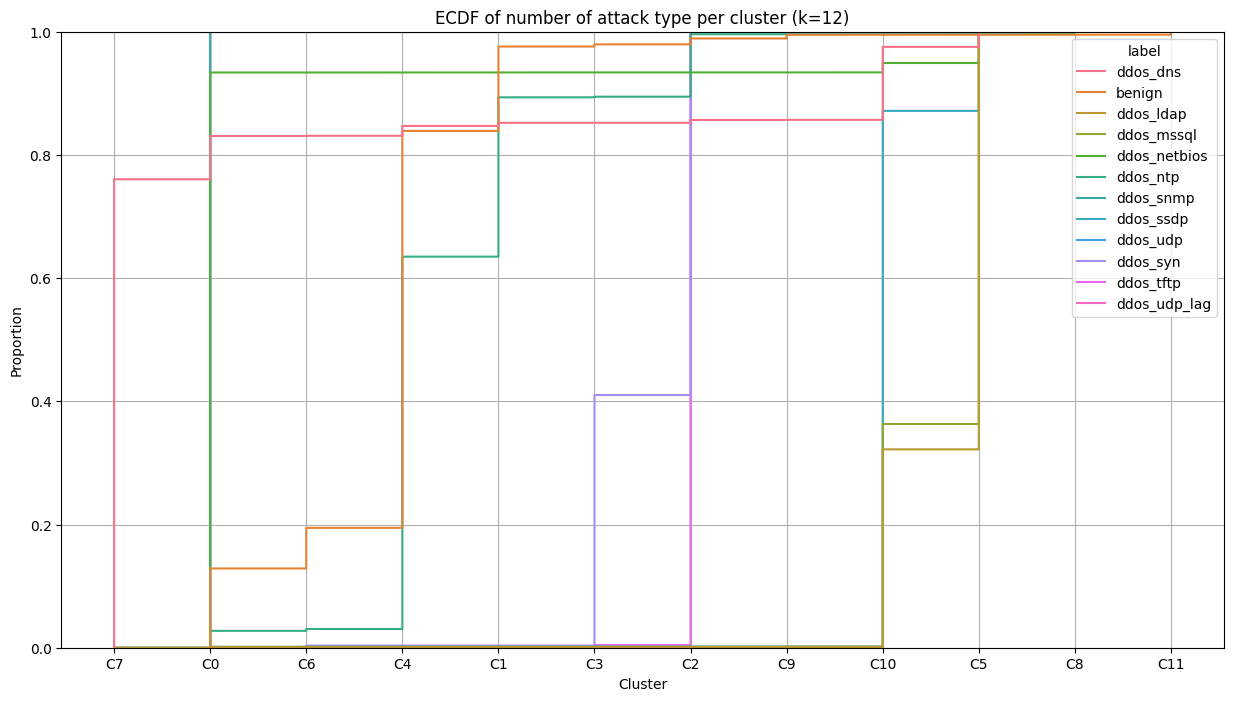

In [78]:
# ECDF of number of attack type  per cluster (k=12)
plt.figure(figsize=(15, 8))
sns.ecdfplot(data=projection, x='cid3_KM', hue='label')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.title('ECDF of number of attack type per cluster (k=12)')
plt.grid()
plt.show()

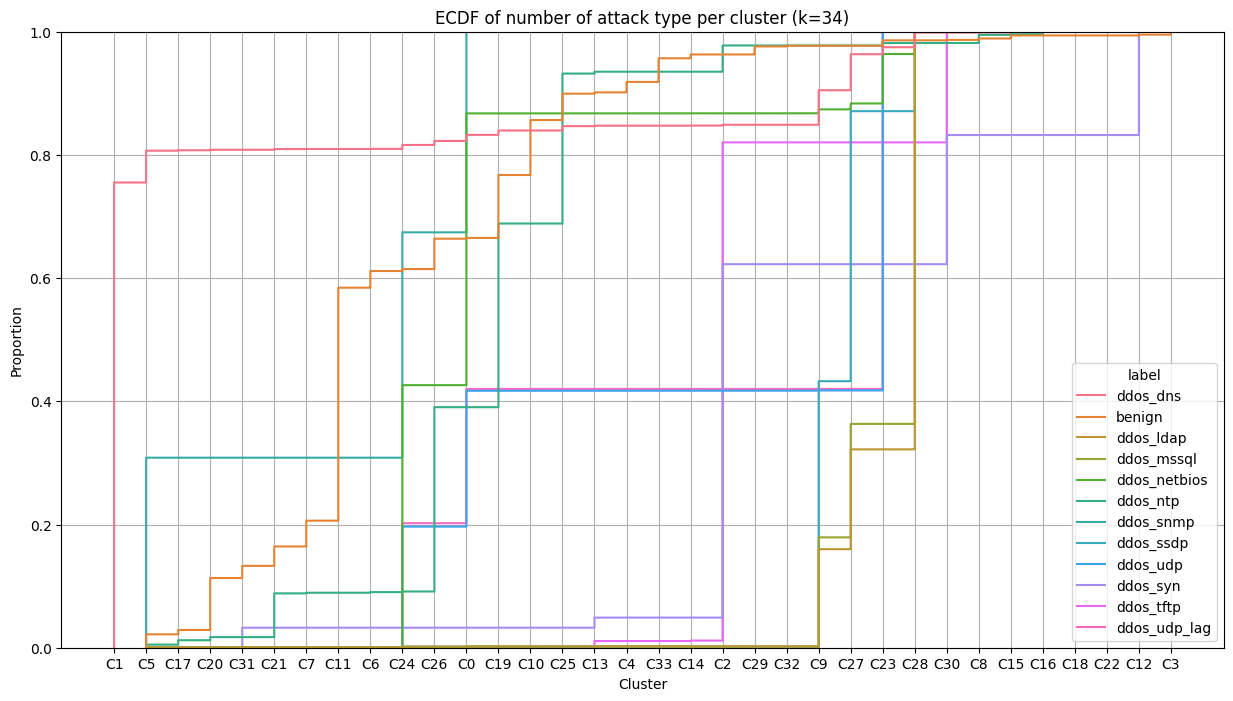

In [79]:
# ECDF of number of attack type per cluster (k=best_n)
plt.figure(figsize=(15, 8))
sns.ecdfplot(data=projection, x='cidBest_KM', hue='label')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.title(f'ECDF of number of attack type per cluster (k={best_n})')
plt.grid()
plt.show()

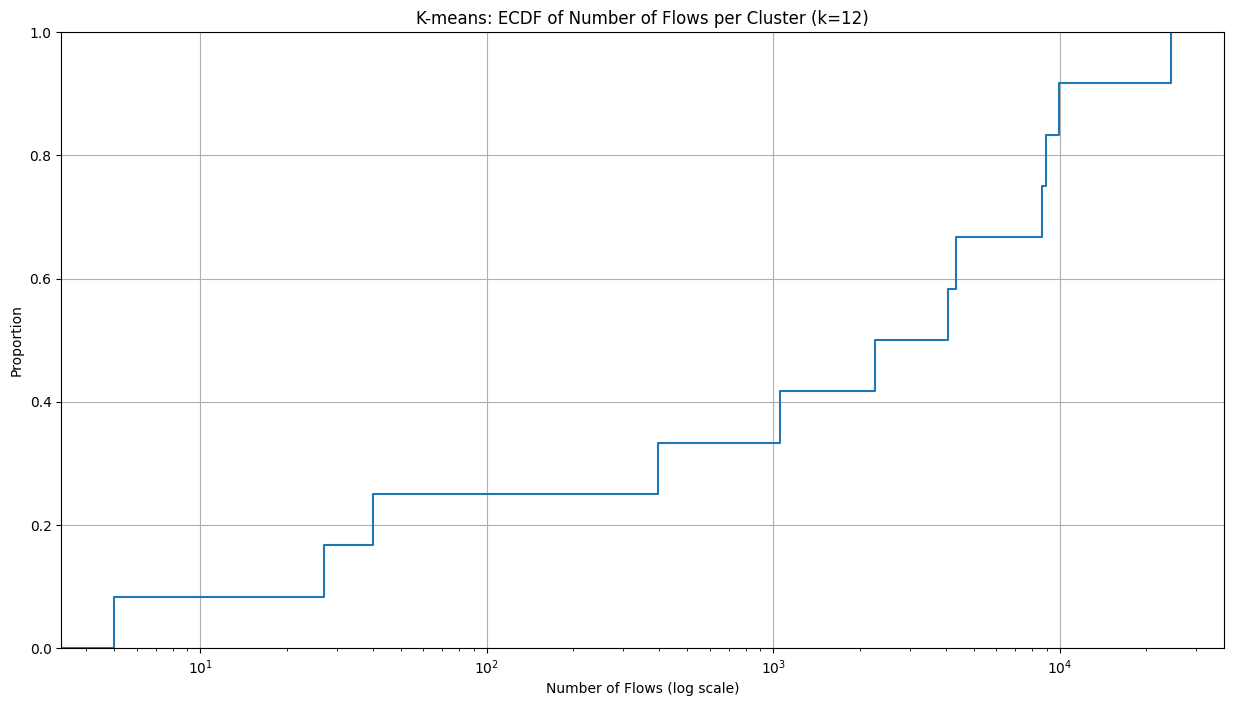

In [102]:
cluster_labels = projection.cid3_KM
cluster_sizes = np.unique(cluster_labels, return_counts=True)[1]
sorted_sizes = np.sort(cluster_sizes)
# ECDF Plot
plt.figure(figsize=(15, 8))
sns.ecdfplot(data=sorted_sizes)
plt.xscale('log')
plt.title('K-means: ECDF of Number of Flows per Cluster (k=12)')
plt.xlabel('Number of Flows (log scale)')
plt.ylabel('Proportion')
plt.grid()
plt.show()

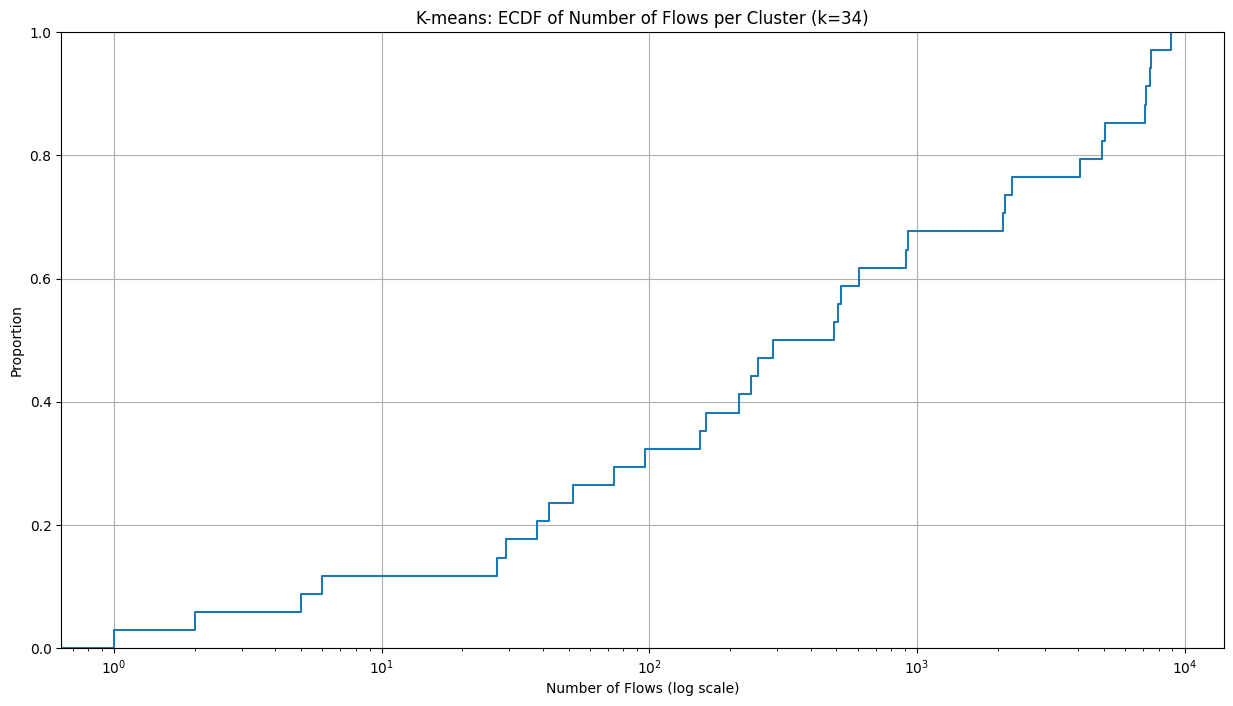

In [104]:
cluster_labels = projection.cidBest_KM
cluster_sizes = np.unique(cluster_labels, return_counts=True)[1]
sorted_sizes = np.sort(cluster_sizes)
# ECDF Plot
plt.figure(figsize=(15, 8))
sns.ecdfplot(data=sorted_sizes)
plt.xscale('log')
plt.title(f'K-means: ECDF of Number of Flows per Cluster (k={best_n})')
plt.xlabel('Number of Flows (log scale)')
plt.ylabel('Proportion')
plt.grid()
plt.show()

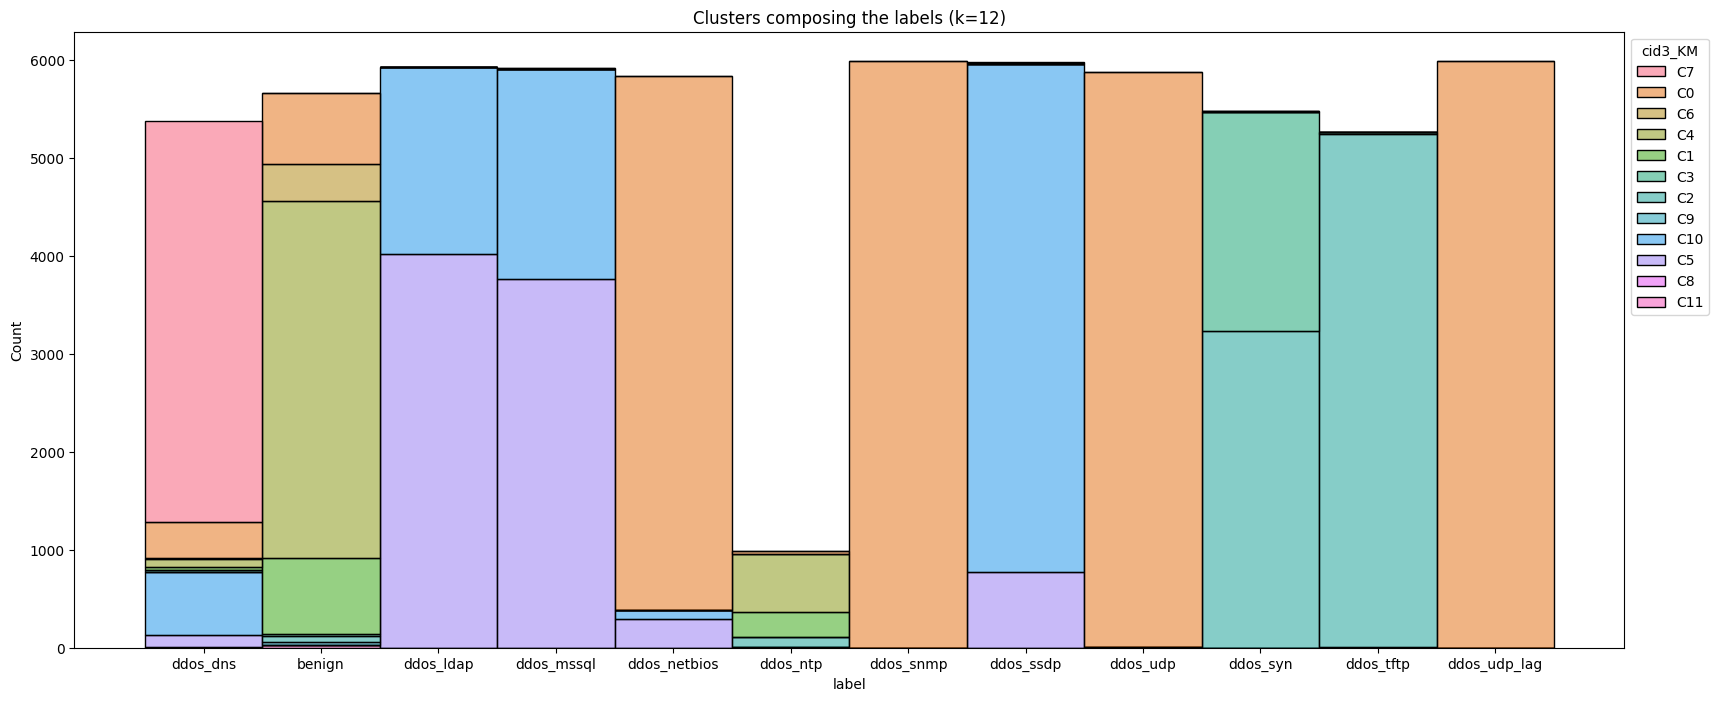

In [147]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection,
    palette="husl",
    x = "label", 
    hue = "cid3_KM",
    multiple="stack",
    # bins = 50,
    # binrange = (0,20),
    alpha = 0.6
)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Clusters composing the labels (k=12)')
plt.show()

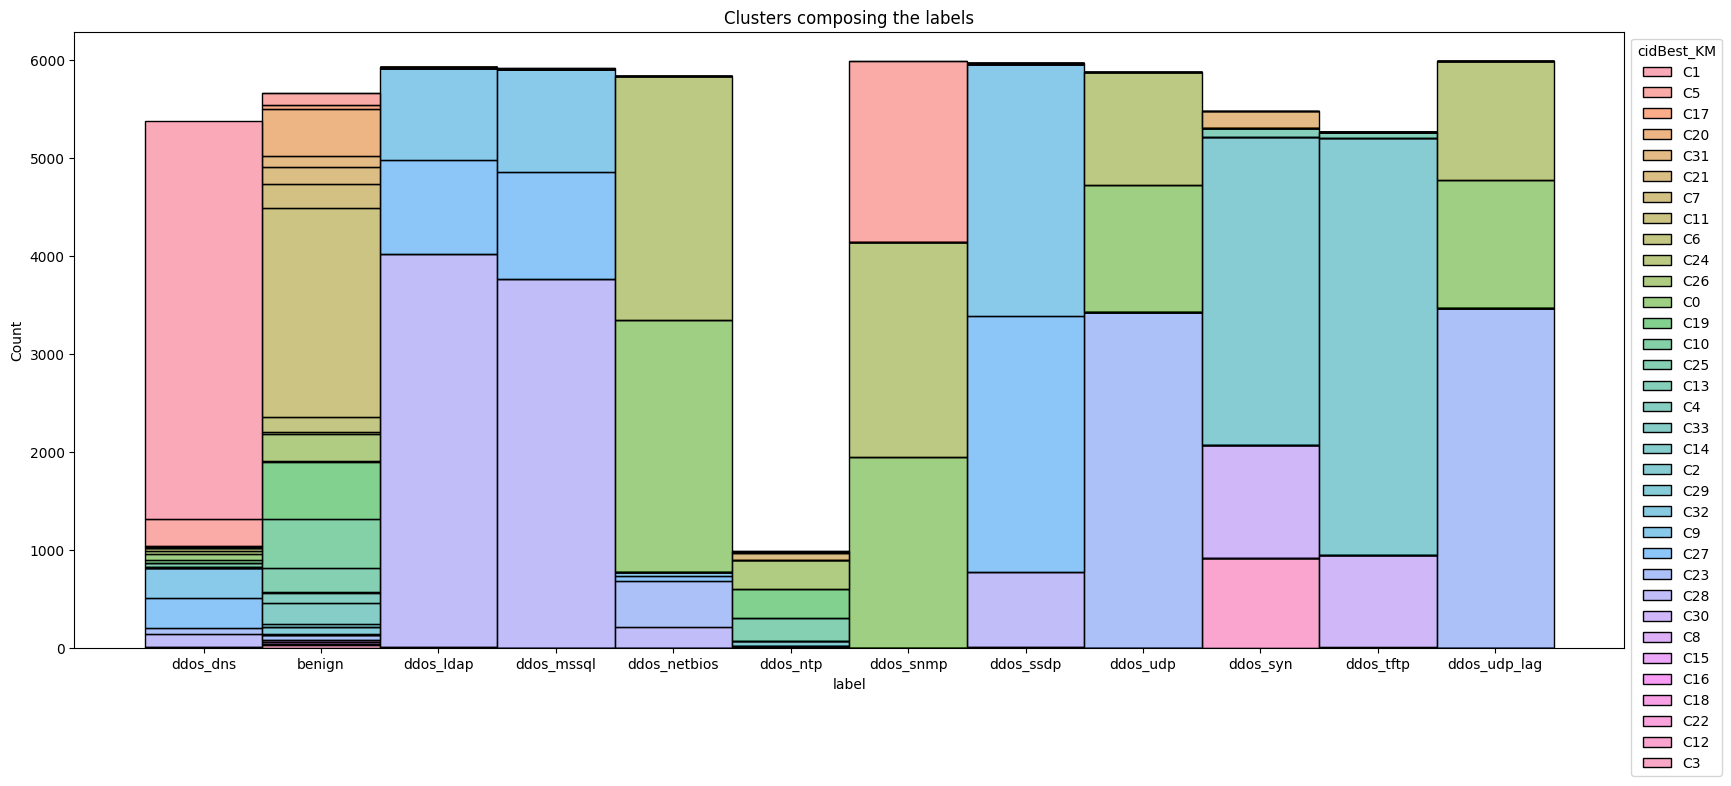

In [131]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection,
    palette="husl",
    x = "label", 
    hue = "cidBest_KM",
    multiple="stack",
    # bins = 50,
    # binrange = (0,20),
    alpha = 0.6
)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Clusters composing the labels')
plt.show()

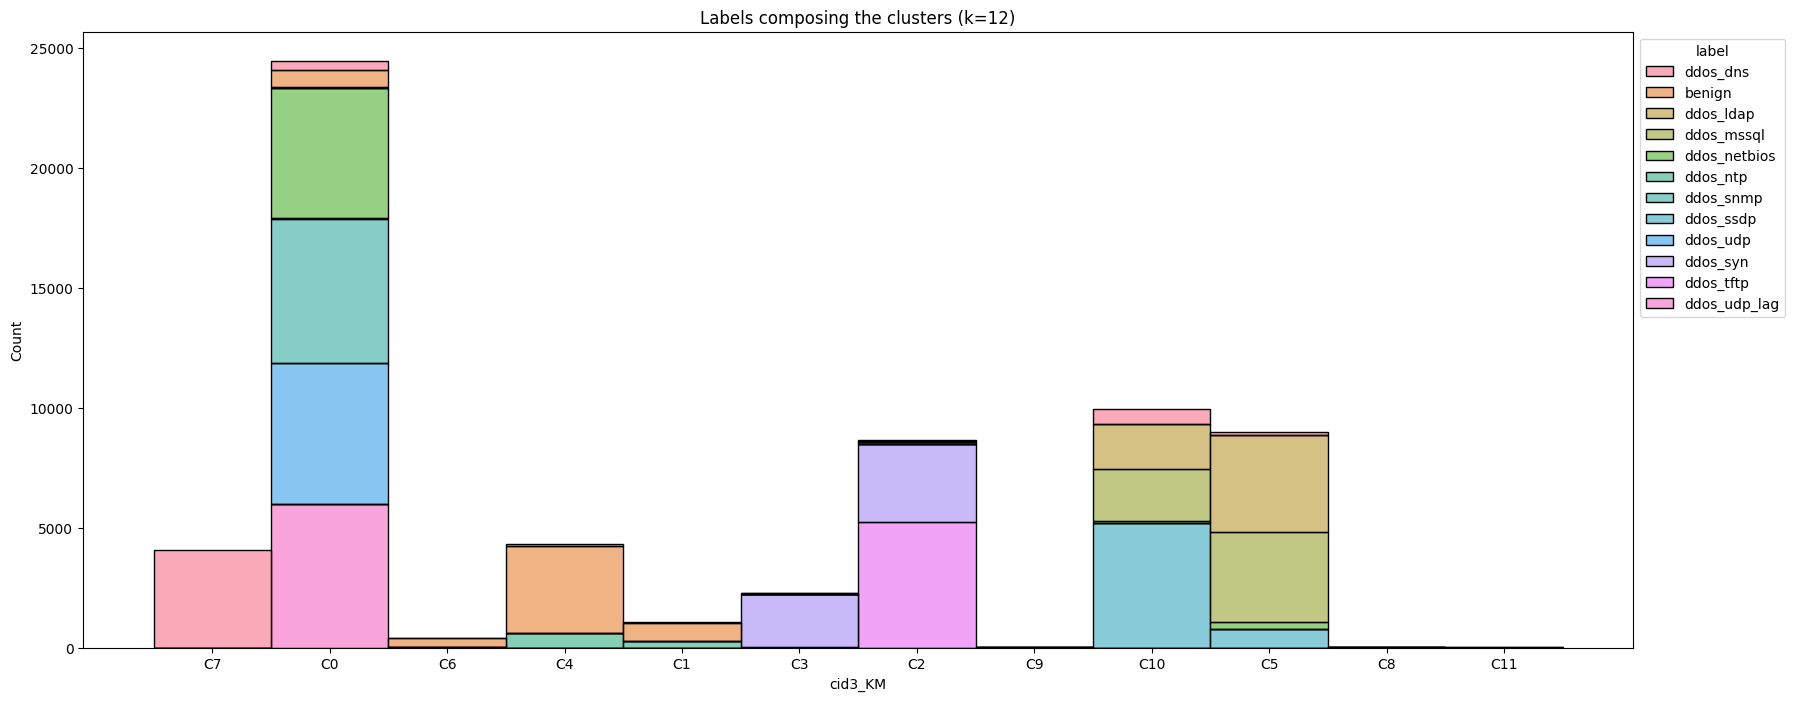

In [148]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection,
    palette="husl",
    x = "cid3_KM", 
    hue = "label", 
    multiple="stack",
    # bins = 50,
    # binrange = (0,20),
    alpha = 0.6
)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Labels composing the clusters (k=12)')
plt.show()

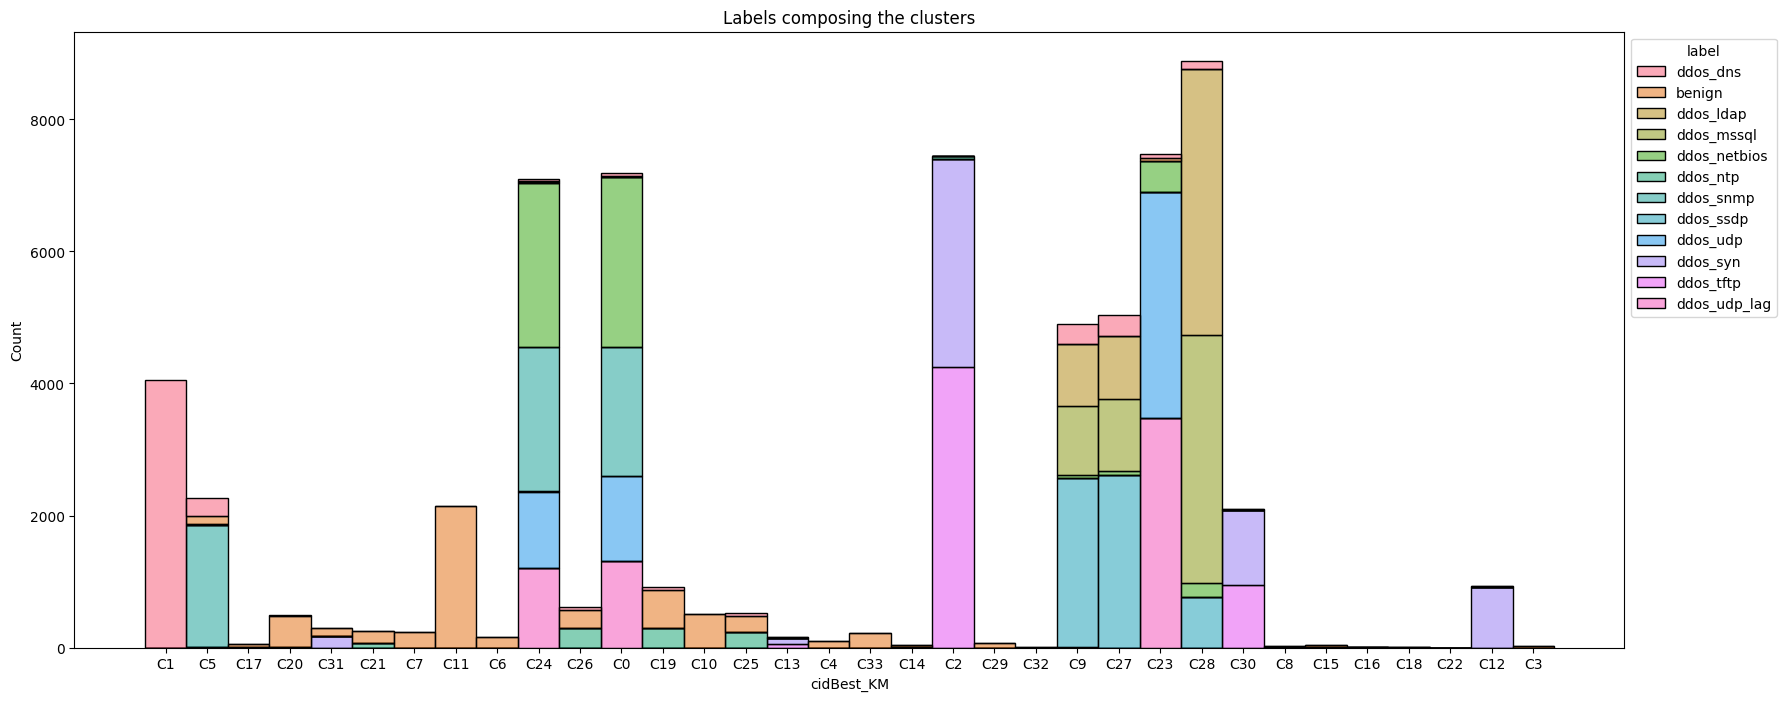

In [137]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection,
    palette="husl",
    x = "cidBest_KM", 
    hue = "label", 
    multiple="stack",
    # bins = 50,
    # binrange = (0,20),
    alpha = 0.6
)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Labels composing the clusters')
plt.show()

## Gaussian Mixture Model
**Gaussian mixture model (GMM)** is a **soft** clustering approach that provides the degree of beloging of each of the m observatios to k different clusters. Each cluster is represented by a gaussian distribution.  
Useful links: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html">GMM in sklearn</a>.

``n_components`` indicates the number of clusters to use.
``init_params`` indicates the method used to initialize the weights, the means and the precisions.

In [80]:
# GMM
# GMM with n_components=12 - which is the number of labels
gmm= GaussianMixture(n_components = 12)
cl_gmm_labels12 = gmm.fit_predict(X) # Get cluster ID

# Unsupervised metric
silhouette  = silhouette_score(X, cl_gmm_labels12)
log_l=gmm.score(X)
# Supervised metrics
ri = rand_score(np.ravel(y), cl_gmm_labels12)
ari = adjusted_rand_score(np.ravel(y), cl_gmm_labels12)

print('GMM with 12 clusters')
# report effective size
print("Effetive size of each cluster: ", gmm.weights_)

# report usupervised and supervised metric
print(f'GMM total log-likelihood score:, {round(log_l, 2)}')
print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')


GMM with 12 clusters
Effetive size of each cluster:  [0.03482308 0.07506933 0.14971668 0.12945407 0.03855693 0.00042031
 0.34563072 0.00084061 0.16258036 0.03711141 0.02515826 0.00063824]
GMM total log-likelihood score:, 125.06
Silhouette: 0.17
RI: 0.82
ARI: 0.26


In [19]:
n_cluster_list=[]
shs_list = []
ri_list = []
ari_list = []
log_l_list=[]


for n_clusters in range(10, 40):
    gmm = GaussianMixture(n_components=n_clusters)
    cl_gmm__labels = gmm.fit_predict(X)
    # Unsupervised metric
    silhouette  = silhouette_score(X, cl_gmm__labels)
    n_cluster_list.append(n_clusters)
    shs_list.append(silhouette)
    ri_list.append(rand_score(np.ravel(y), cl_gmm__labels))
    ari_list.append(adjusted_rand_score(np.ravel(y), cl_gmm__labels))
    log_l_list.append(gmm.score(X))

    print(f"{n_clusters} clusters: GMM total log-likelihood score: {round(gmm.score(X), 2)}, silhouette {round(silhouette, 2)}")

10 clusters: GMM total log-likelihood score: 119.32, silhouette 0.28
11 clusters: GMM total log-likelihood score: 121.28, silhouette 0.33
12 clusters: GMM total log-likelihood score: 118.49, silhouette 0.3
13 clusters: GMM total log-likelihood score: 122.5, silhouette 0.38
14 clusters: GMM total log-likelihood score: 121.75, silhouette 0.37
15 clusters: GMM total log-likelihood score: 126.04, silhouette 0.31
16 clusters: GMM total log-likelihood score: 123.09, silhouette 0.34
17 clusters: GMM total log-likelihood score: 123.88, silhouette 0.4
18 clusters: GMM total log-likelihood score: 128.66, silhouette 0.31
19 clusters: GMM total log-likelihood score: 130.04, silhouette 0.38
20 clusters: GMM total log-likelihood score: 135.22, silhouette 0.24
21 clusters: GMM total log-likelihood score: 133.95, silhouette 0.37
22 clusters: GMM total log-likelihood score: 130.85, silhouette 0.38
23 clusters: GMM total log-likelihood score: 136.6, silhouette 0.26
24 clusters: GMM total log-likelihood 

best k:  31  with corresponding silhouette:  0.42430455381386173


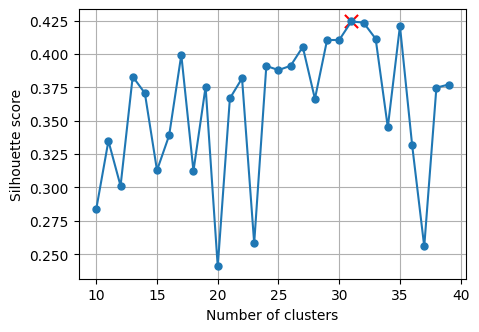

In [22]:
# Get n_clusters leading to the highest silhouette
best_sh= np.max(shs_list)
best_n=n_cluster_list[np.argmax(shs_list)]
print("best k: ",best_n, " with corresponding silhouette: ", best_sh)

# Plot
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,shs_list, marker='o', markersize=5)
plt.scatter(best_n, best_sh, color='r', marker='x', s=90)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

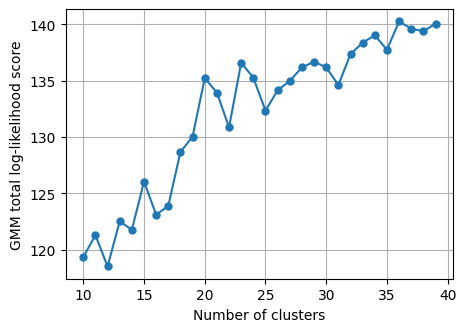

In [23]:
# Plot GMM total log-likelihood score
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,log_l_list, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('GMM total log-likelihood score')
plt.show()

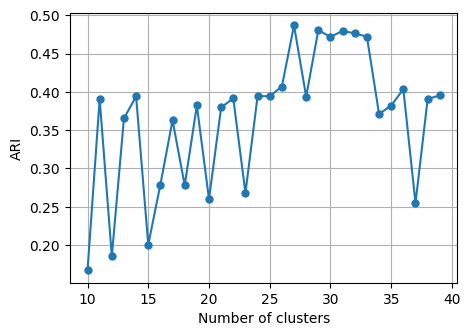

In [24]:
# Plot ARI
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,ari_list, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('ARI')
plt.show()

In [115]:
# cella di test
best_n = 31

In [116]:
# GMM
# GMM with n_components=best_n
gmm = GaussianMixture(n_components = best_n)
cl_gmm_labels = gmm.fit_predict(X) # Get cluster ID

# Unsupervised metric
silhouette  = silhouette_score(X, cl_gmm_labels)
log_l=gmm.score(X)
# Supervised metrics
ri = rand_score(np.ravel(y), cl_gmm_labels)
ari = adjusted_rand_score(np.ravel(y), cl_gmm_labels)

print(f'GMM with {best_n} clusters')
# report effective size
print("Effetive size of each cluster: ", gmm.weights_)

# report usupervised and supervised metric
print(f'GMM total log-likelihood score:, {round(log_l, 2)}')
print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')

GMM with 31 clusters
Effetive size of each cluster:  [7.54732859e-02 1.73702052e-01 6.35595199e-02 2.00812579e-03
 1.28110363e-02 1.50375942e-02 5.91540964e-04 2.19270617e-02
 7.36362394e-03 6.22674699e-04 8.25312043e-03 4.20305422e-04
 1.15039150e-01 2.38565804e-03 5.54178288e-03 7.08287248e-03
 1.41293271e-01 3.29083668e-02 1.55668675e-05 8.25043976e-04
 2.17936145e-04 3.11337350e-05 6.41719093e-02 3.49631844e-02
 1.58782048e-03 7.78343374e-05 9.34012049e-05 1.08721736e-01
 9.31988356e-02 7.16350829e-03 2.91104761e-03]
GMM total log-likelihood score:, 139.22
Silhouette: 0.35
RI: 0.9
ARI: 0.42


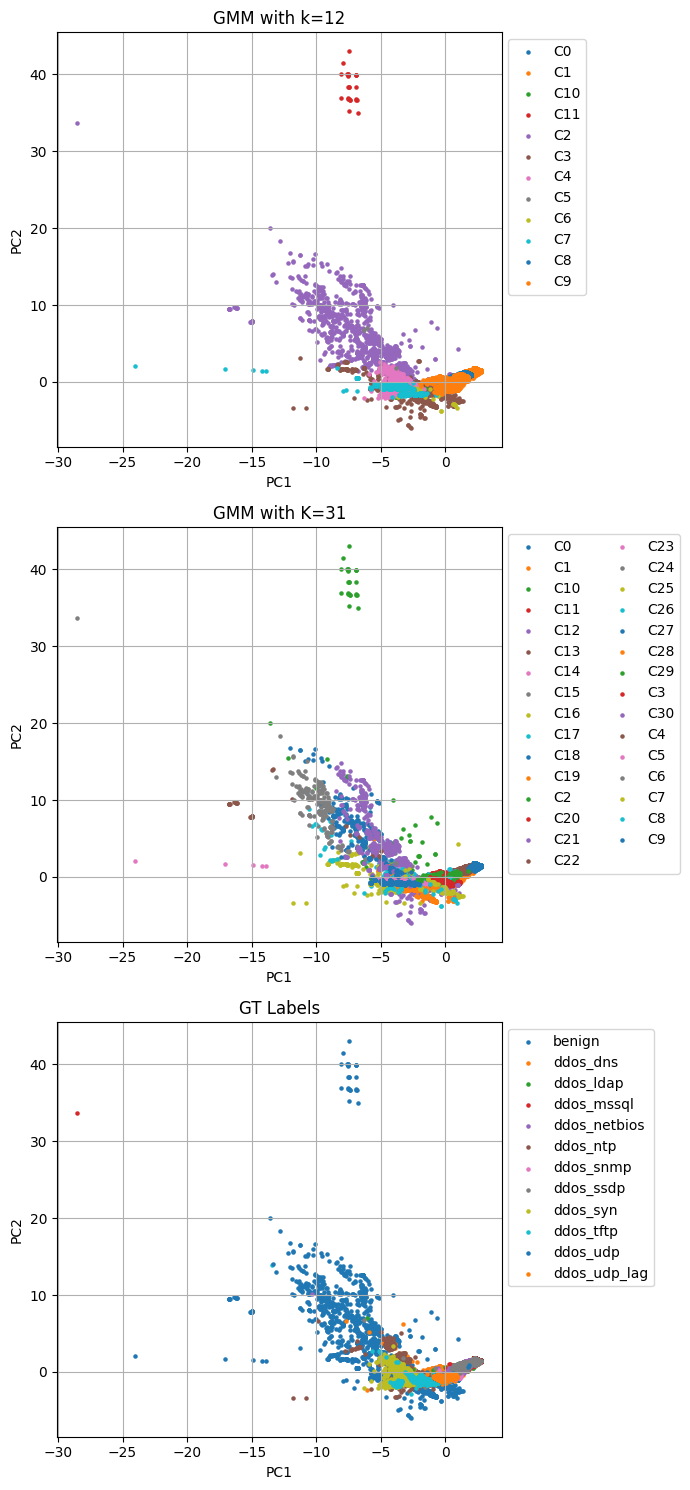

In [82]:
# We reuse the same PCA as before

#running again GMM with k=12 and best k to save the labels
gmm = GaussianMixture(n_components=best_n)
cl_labels = gmm.fit_predict(X)
gmm12 = GaussianMixture(n_components=12)
cl_labels12 = gmm12.fit_predict(X)

# Assign the cluster labels to the projection DataFrame
projection['cid3_GMM'] = [f'C{x}' for x in cl_labels12]
projection['cidBest_GMM'] = [f'C{x}' for x in cl_labels]
projection['label'] = y.reshape(-1)

fig, axs = plt.subplots(3, 1, figsize=(7, 15))

# Each cluster is plotter separately with a unique color
for i in np.unique(projection.cid3_GMM):
    subdf = projection[projection.cid3_GMM==i]
    axs[0].scatter(subdf[0], subdf[1], label=i, s=5)
axs[0].grid()
lgnd = axs[0].legend(bbox_to_anchor=(1, 1), loc="upper left")
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')
axs[0].set_title('GMM with k=12')
    
for i in np.unique(projection.cidBest_GMM):
    subdf = projection[projection.cidBest_GMM==i]
    axs[1].scatter(subdf[0], subdf[1], label=i, s=5)
axs[1].grid()
lgnd = axs[1].legend(bbox_to_anchor=(1, 1), loc="upper left", ncol=2)

axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].set_title(f'GMM with K={best_n}')

for i in np.unique(y):
    subdf = projection[projection.label==i]
    axs[2].scatter(subdf[0], subdf[1], label=i, s=5)
axs[2].grid()
lgnd = axs[2].legend(bbox_to_anchor=(1, 1), loc="upper left")
axs[2].set_xlabel('PC1')
axs[2].set_ylabel('PC2')
axs[2].set_title('GT Labels')


plt.tight_layout() #Ensures that the subplots do not overlap and fit neatly within the figure
plt.show()

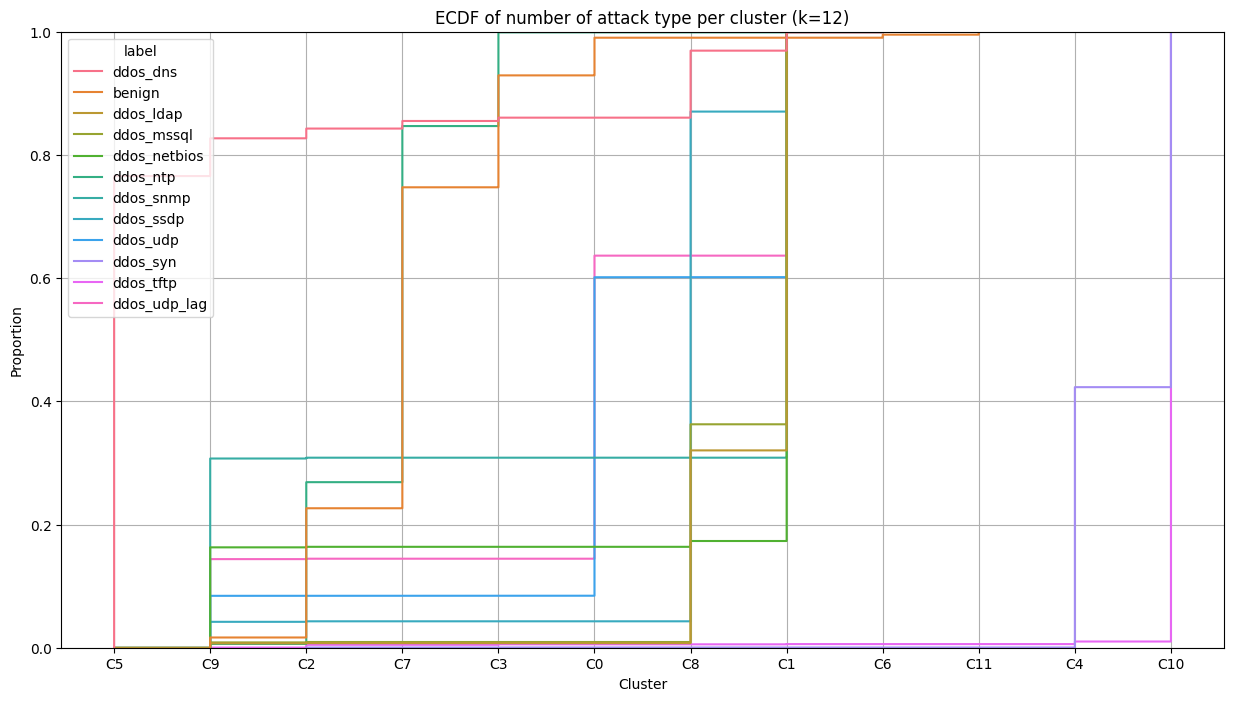

In [84]:
# ECDF of number of attack type  per cluster (k=12)
plt.figure(figsize=(15, 8))
sns.ecdfplot(data=projection, x='cid3_GMM', hue='label')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.title('ECDF of number of attack type per cluster (k=12)')
plt.grid()
plt.show()

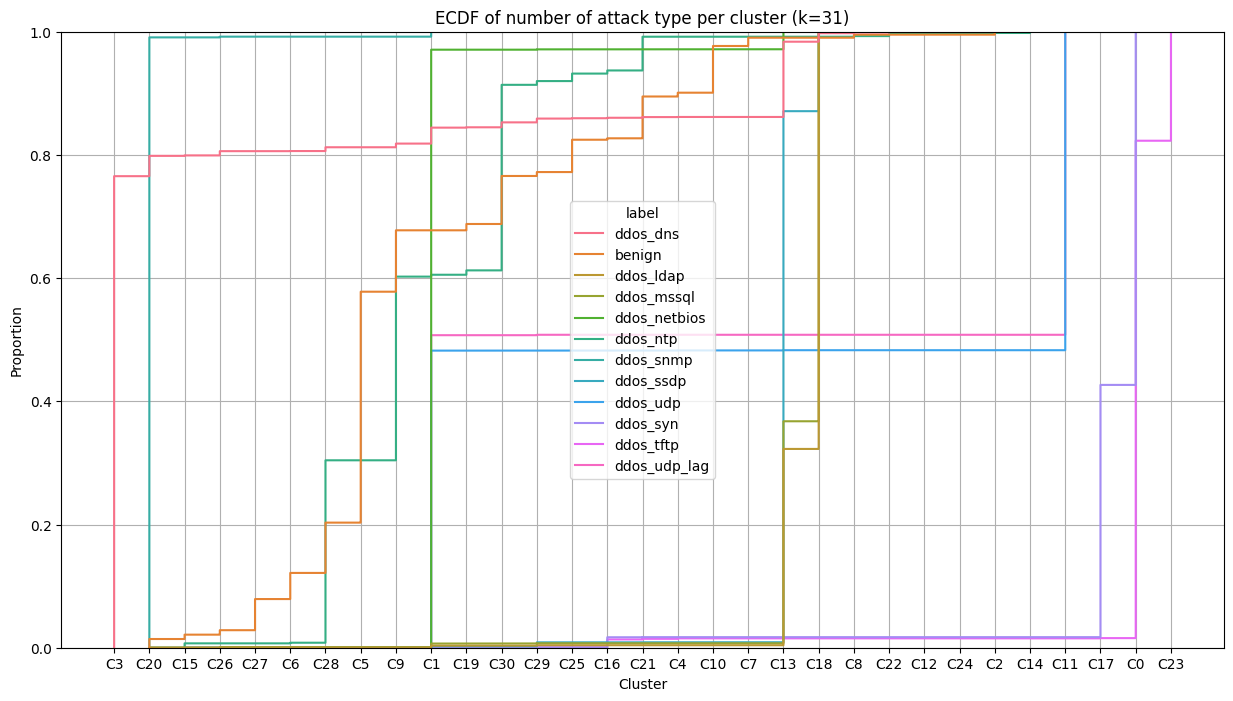

In [146]:
# ECDF of number of attack type per cluster (k=best_n)
plt.figure(figsize=(15, 8))
sns.ecdfplot(data=projection, x='cidBest_GMM', hue='label')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.title(f'ECDF of number of attack type per cluster (k={best_n})')
plt.grid()
plt.show()

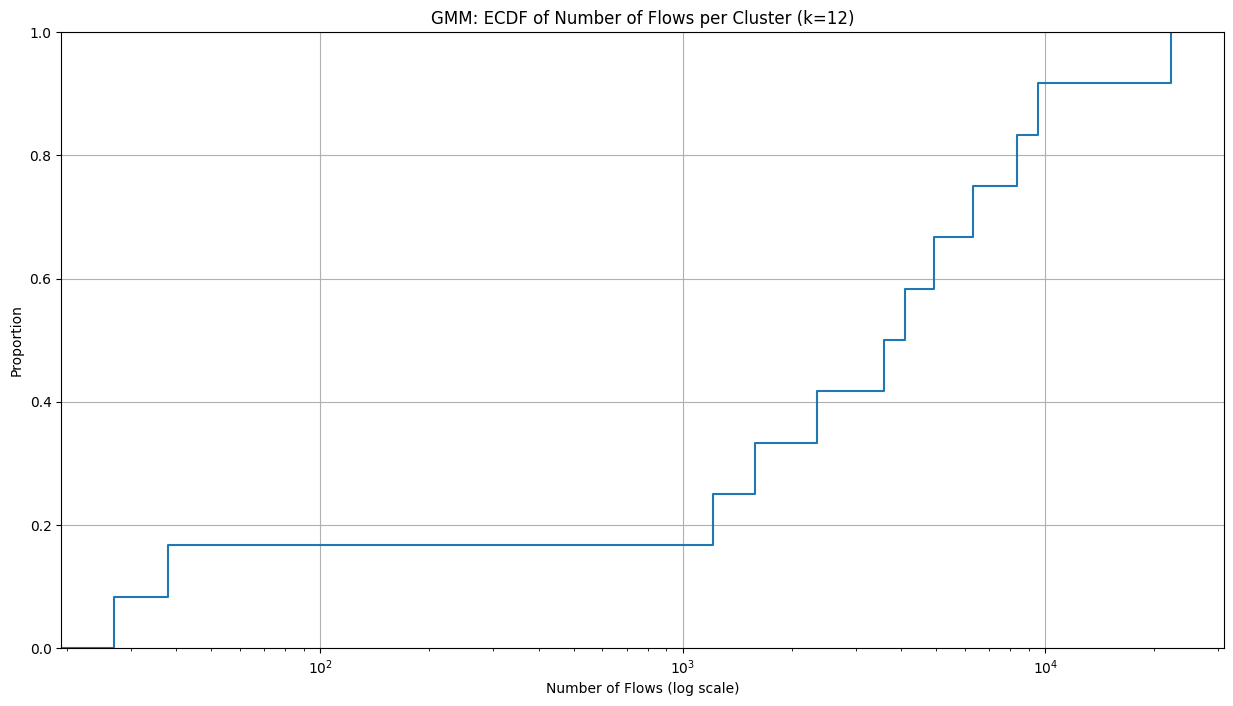

In [107]:
cluster_labels = projection.cid3_GMM
cluster_sizes = np.unique(cluster_labels, return_counts=True)[1]
sorted_sizes = np.sort(cluster_sizes)
# ECDF Plot
plt.figure(figsize=(15, 8))
sns.ecdfplot(data=sorted_sizes)
plt.xscale('log')
plt.title('GMM: ECDF of Number of Flows per Cluster (k=12)')
plt.xlabel('Number of Flows (log scale)')
plt.ylabel('Proportion')
plt.grid()
plt.show()

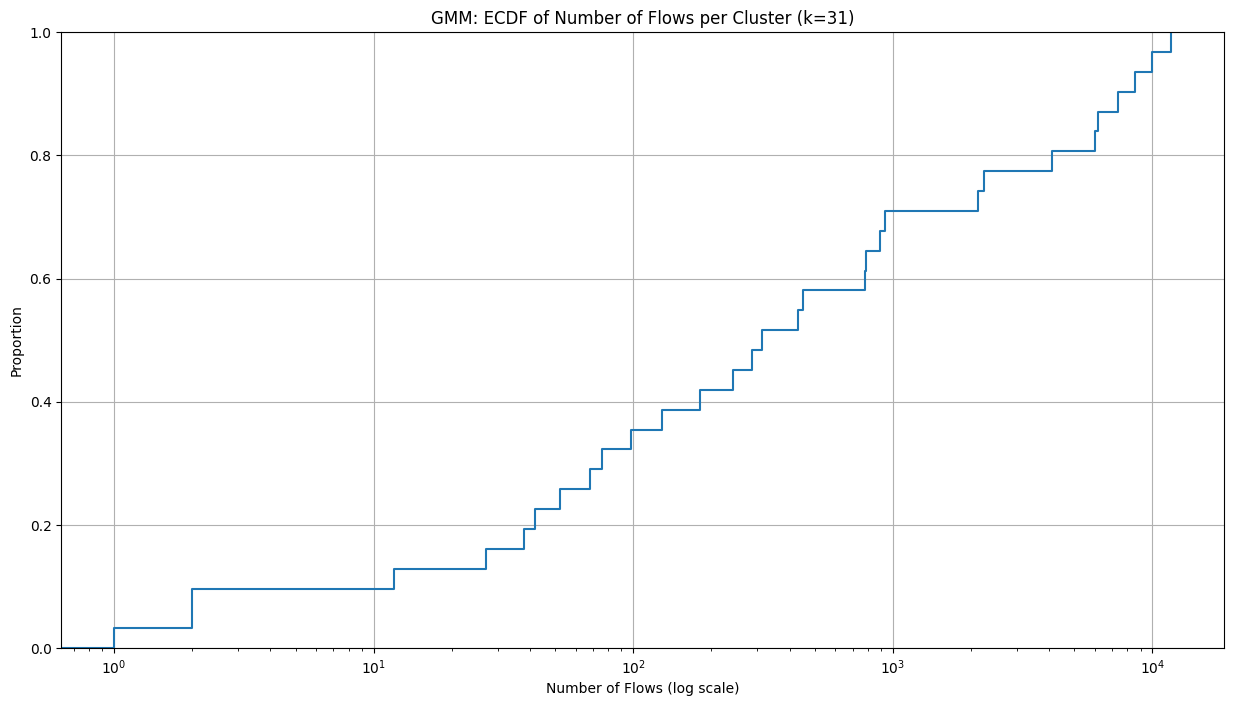

In [108]:
cluster_labels = projection.cidBest_GMM
cluster_sizes = np.unique(cluster_labels, return_counts=True)[1]
sorted_sizes = np.sort(cluster_sizes)
# ECDF Plot
plt.figure(figsize=(15, 8))
sns.ecdfplot(data=sorted_sizes)
plt.xscale('log')
plt.title(f'GMM: ECDF of Number of Flows per Cluster (k={best_n})')
plt.xlabel('Number of Flows (log scale)')
plt.ylabel('Proportion')
plt.grid()
plt.show()

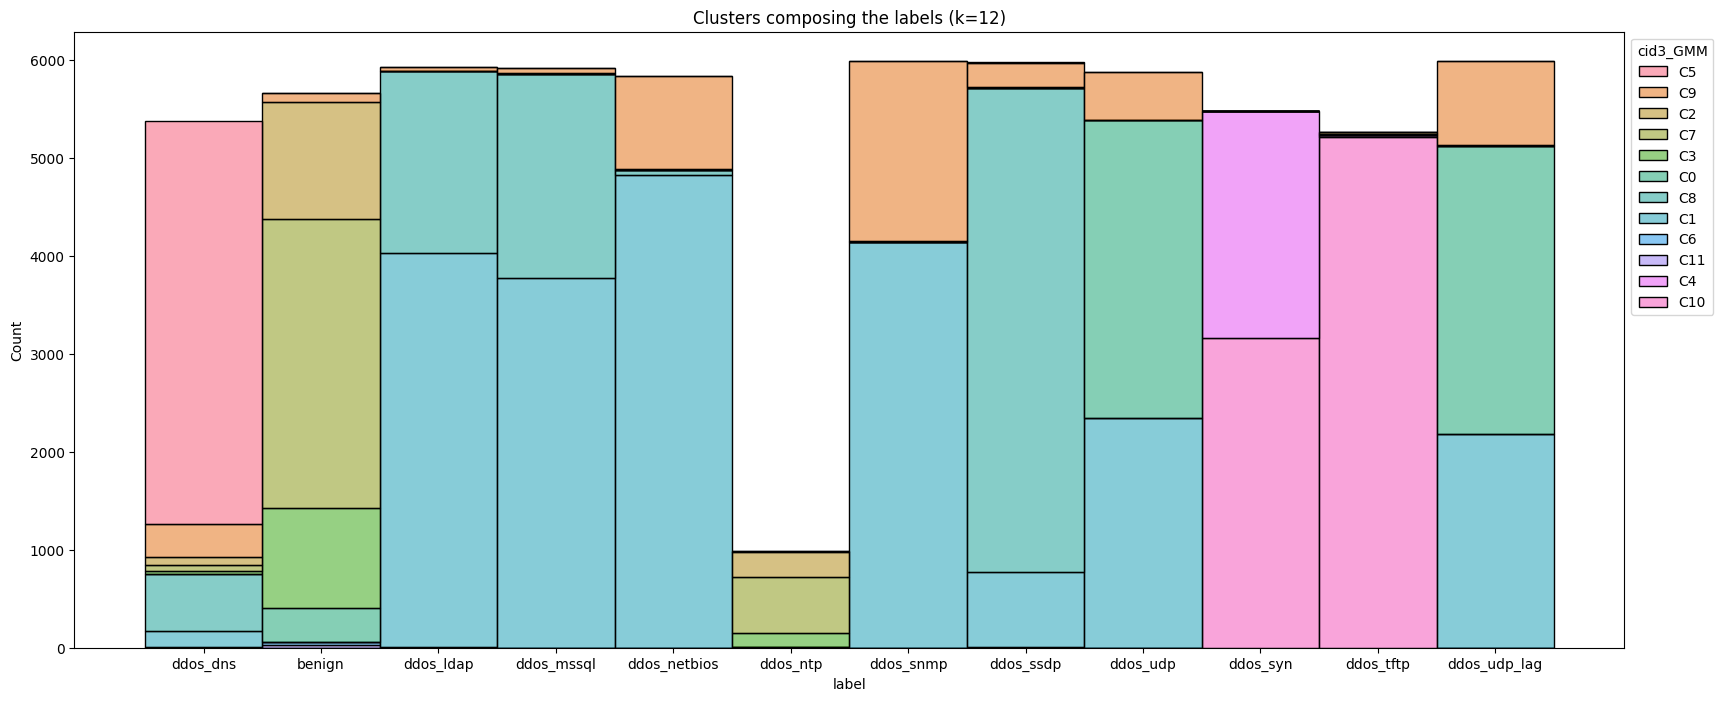

In [149]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection,
    palette="husl",
    x = "label", 
    hue = "cid3_GMM",
    multiple="stack",
    # bins = 50,
    # binrange = (0,20),
    alpha = 0.6
)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Clusters composing the labels (k=12)')
plt.show()

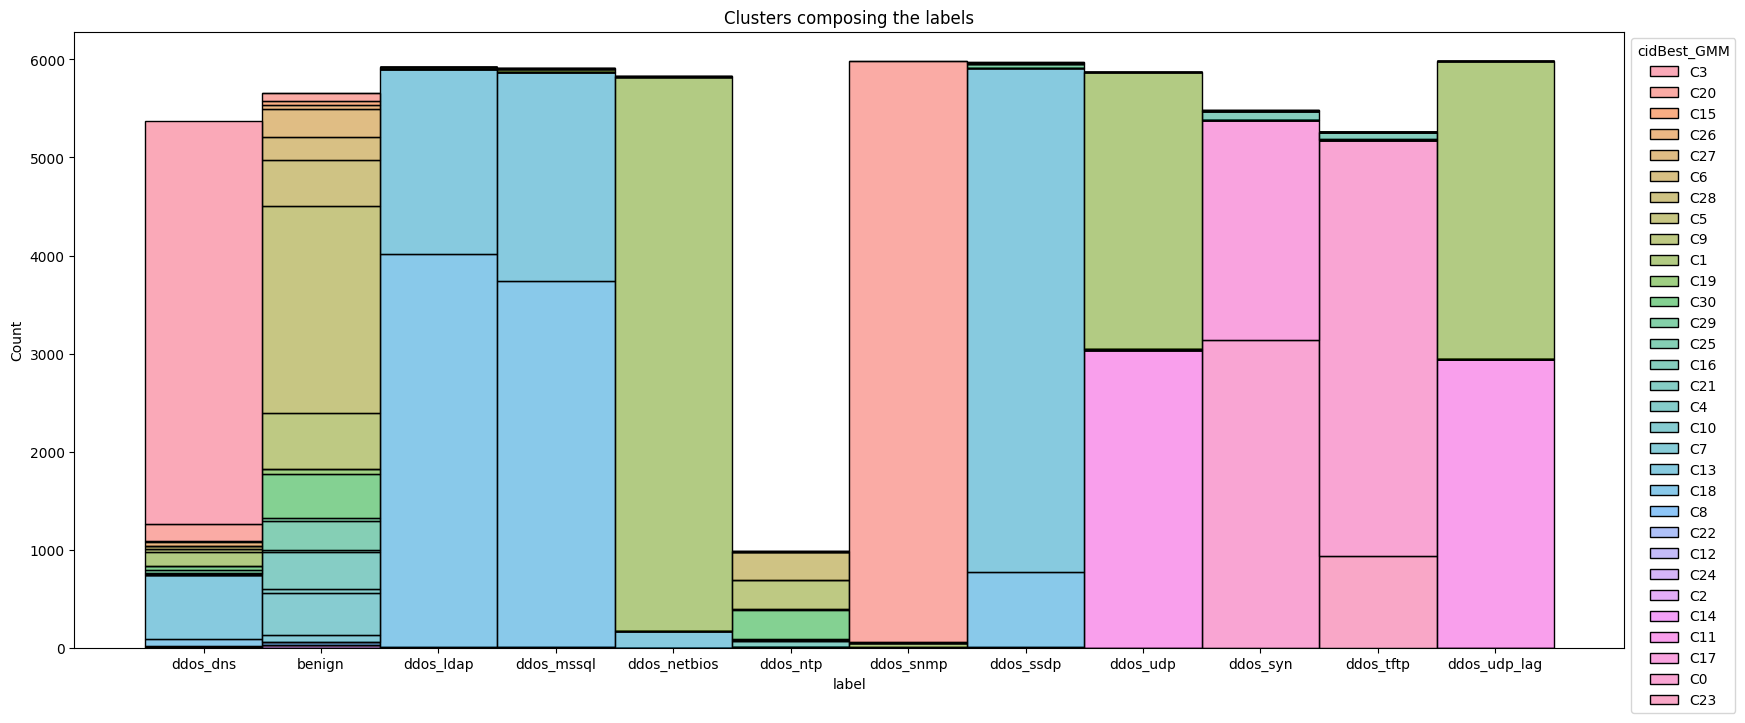

In [128]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection,
    palette="husl",
    x = "label", 
    hue = "cidBest_GMM", 
    multiple="stack",
    # bins = 50,
    # binrange = (0,20),
    alpha = 0.6
)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Clusters composing the labels')
plt.show()

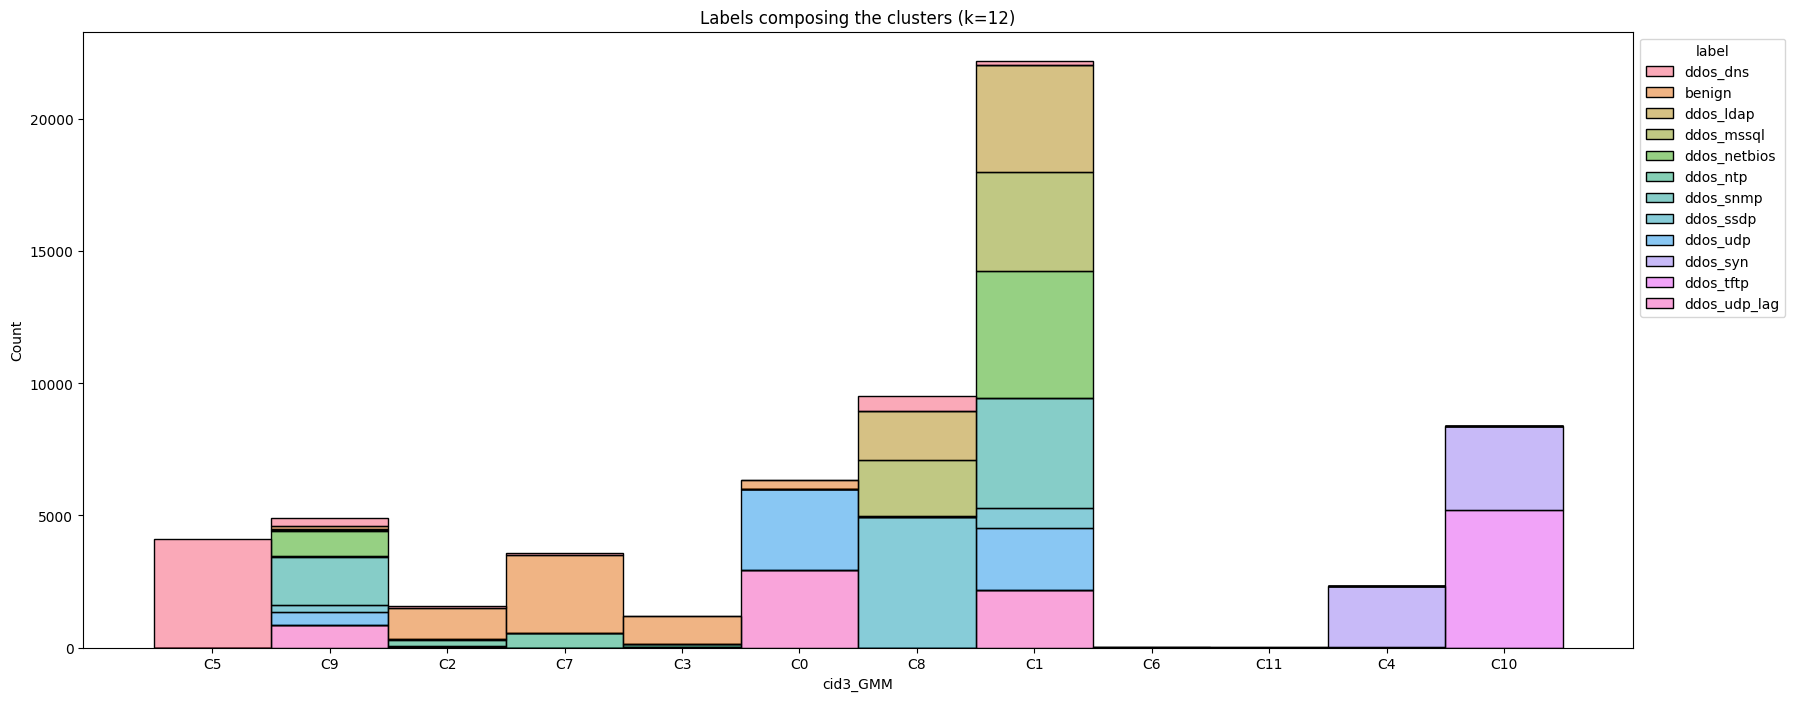

In [150]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection,
    palette="husl",
    x = "cid3_GMM", 
    hue = "label", 
    multiple="stack",
    # bins = 50,
    # binrange = (0,20),
    alpha = 0.6
)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Labels composing the clusters (k=12)')
plt.show()

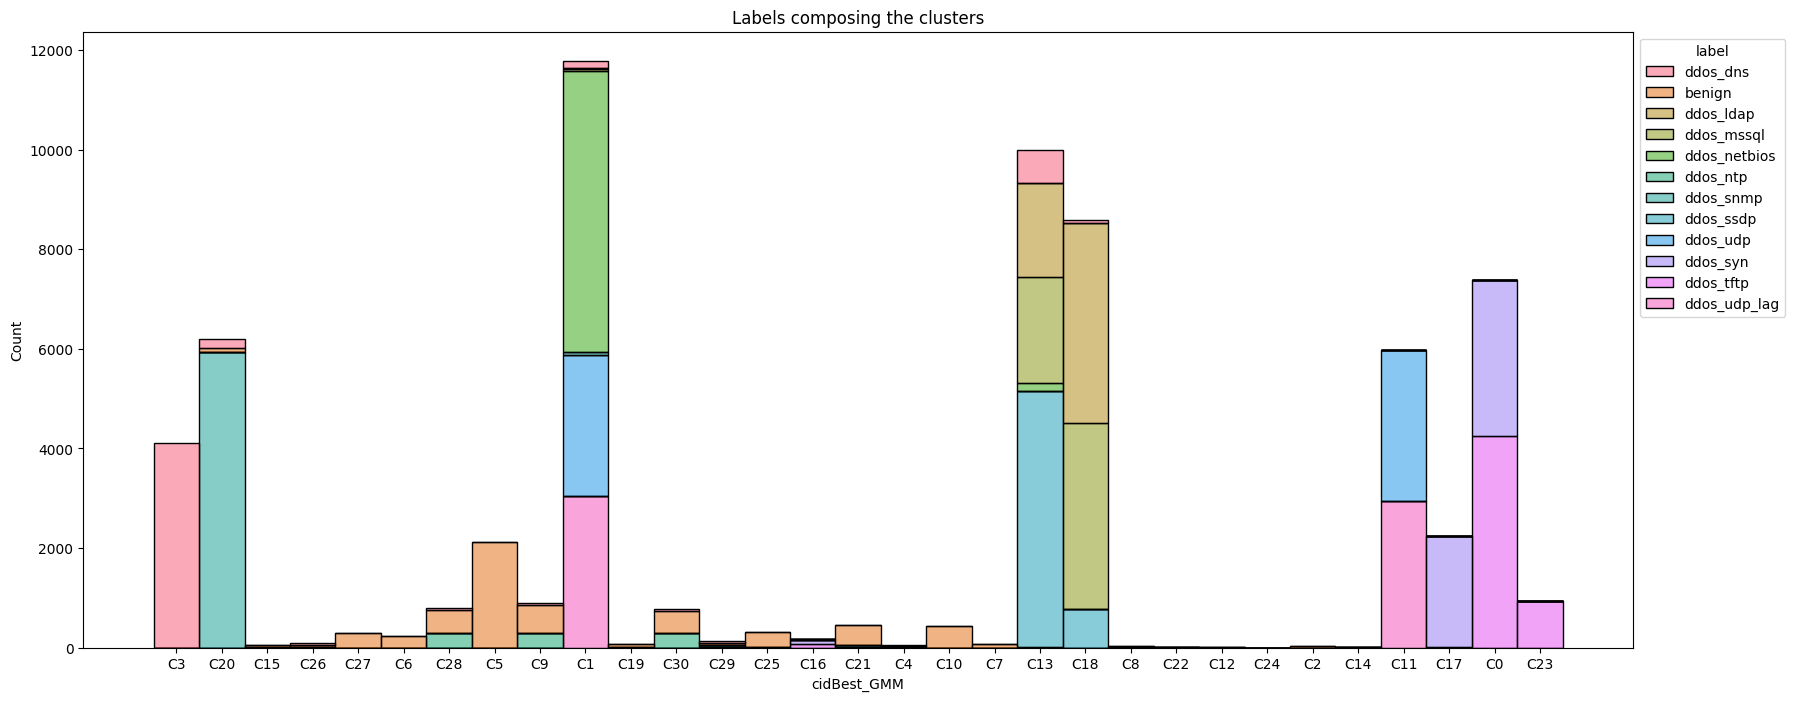

In [139]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection,
    palette="husl",
    x = "cidBest_GMM", 
    hue = "label", 
    multiple="stack",
    # bins = 50,
    # binrange = (0,20),
    alpha = 0.6
)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Labels composing the clusters')
plt.show()

## DBSCAN
**DBSCAN** is a density-based algorithm, we do not have to provide the number of clusters. The performance won't be evaluated by changing k but by varying two other parameters by performing a Grid Search:
- ``epsilon``: Maximum distance to be connected;
- ``min_samples``: Minimum number of neighbors to be a core point;

It consists of iterating over different values (combination) for two or more parameters, choosing the one leading to the best quality metrics. The number of clusters will depend on these two parameters.

Reference link: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html">DBSCAN</a>.

In [7]:
# Let's first use the default options:
#   - eps: 0.5
#   - min_samples: 5

dbscan = DBSCAN()
cl_db_def = dbscan.fit_predict(X) # Get clusters ID

# Unsupervised metric
silhouette  = silhouette_score(X, cl_db_def)
# Supervised metrics
ri = rand_score(np.ravel(y), cl_db_def)
ari = adjusted_rand_score(np.ravel(y), cl_db_def)

# report number and size of each cluster
(unique, counts)=np.unique( cl_db_def, return_counts=True)
print("Number of clusters (including noise): ", len(unique))
print("Size of each cluster: ", counts)
# report usupervised and supervised metric
print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')

Number of clusters (including noise):  150
Size of each cluster:  [ 2144    33   122  3358    66   671     7     5 20110  2016    45     6
   178   140   130    64    19   151   130   103    14    20    26     7
    29    18   120   174   285   121    39    15    13   115    10    46
    39    10    10    23    16    31    23    12     6    12    41    19
    11   803    35   106    19    50    22    41  9405 12785    11     7
     8    55    24    25     8    65    28     9     6    12     8     5
     5     7   115     6     5    36    20     7    46     5     5    13
     8     8     6     5     7     7    23    24     6    16    16    34
    70     8    17     8     8    16     5     7    10     5     5     6
     6     6     5     5    26    44    16     8    16    20    15     5
     6     5     5     6    15     9     6     7     7     5     7     5
     9     5     5     7     5  1379  5236    62  1340    15    15     7
     5     5    10   872    49    23]
Silhouette: 0.12
RI:

In [47]:
# Now analyze the performance varying epsilon and min_samples.
shs2 = []

# Let's add also other parameters
for eps in np.arange(0.5, 14.5, 0.5):
    eps = round(eps,3)
    for mins in range(2, 10, 2):
        dbscan = DBSCAN(eps=eps, min_samples=mins)
        cl_db_labels = dbscan.fit_predict(X)
        try:
            silhouette  = silhouette_score(X, cl_db_labels)
            ri = rand_score(np.ravel(y), cl_db_labels)
            ari = adjusted_rand_score(np.ravel(y), cl_db_labels)
            # report number and size of each cluster
            (unique, counts)=np.unique( cl_db_labels, return_counts=True)
            clusters=len(unique)
            clusters_size = np.array(counts)
            print(f"eps: {eps}, min: {mins}, silhouette {round(silhouette, 2)}, ri: {ri}, ari: {ari}, clusters: {clusters}, clusters_size: {clusters_size}")

        except:
            silhouette = np.nan
        shs2.append((eps, mins, silhouette, ri, ari, clusters, clusters_size))

gs2 = pd.DataFrame(shs2, columns=['eps', 'minPts', 'sh', 'ri', 'ari', 'clusters', 'clusters_size'])
gs2.to_csv('dbscan_values.csv', sep=',')
# gs2 = pd.pivot_table(gs, columns='eps', index='minPts', values='sh', aggfunc=lambda x:x)

eps: 0.5, min: 2, silhouette -0.06, ri: 0.8278782896001508, ari: 0.25313797450067127, clusters: 417, clusters_size: [ 1378    33   123  3358     2     3    66   671     3     7     2     5
 20225  2017    45     6     7   179   140   130    64     2    19     3
   151   130   103     3    14    20    26     3     2     7    29    18
   120   174   285   121    40    15     2    13   115    10    46    39
    10     3    10    23    16    31    23    12     2     6    13    41
    19     3    11     2     2   804    35    20    19     2    50    22
     2     2     4     2    41  9407 12786     2     2     4     8     4
     3     7    55    24     3     2    25    16     8     2     3    65
    28     9     6    12     3     3     4     2     3     2     8     3
     8     5     2     3     5     2     2   115     2     6     5    36
     2     3     3     4    20     3     2     3     7     4     2    46
     5     6     2     2    13    46     4     8     8     6     2     3
     3  

In [86]:
# Load previously saved results from DBSCAN
dbscan_result_df = pd.read_csv("dbscan_values.csv", header=0, index_col=0, engine='python')

# with pd.option_context('display.max_rows', None):  # 'None' removes the limit
    # print(dbscan_result_df[['eps', 'minPts', 'sh', 'ri']])
    

gs_sil = dbscan_result_df[['eps', 'minPts', 'sh']]
gs_sil = pd.pivot_table(gs_sil, columns='eps', index='minPts', values='sh', aggfunc=lambda x:x)

gs_ri = dbscan_result_df[['eps', 'minPts', 'ri']]
gs_ri = pd.pivot_table(gs_ri, columns='eps', index='minPts', values='ri', aggfunc=lambda x:x)


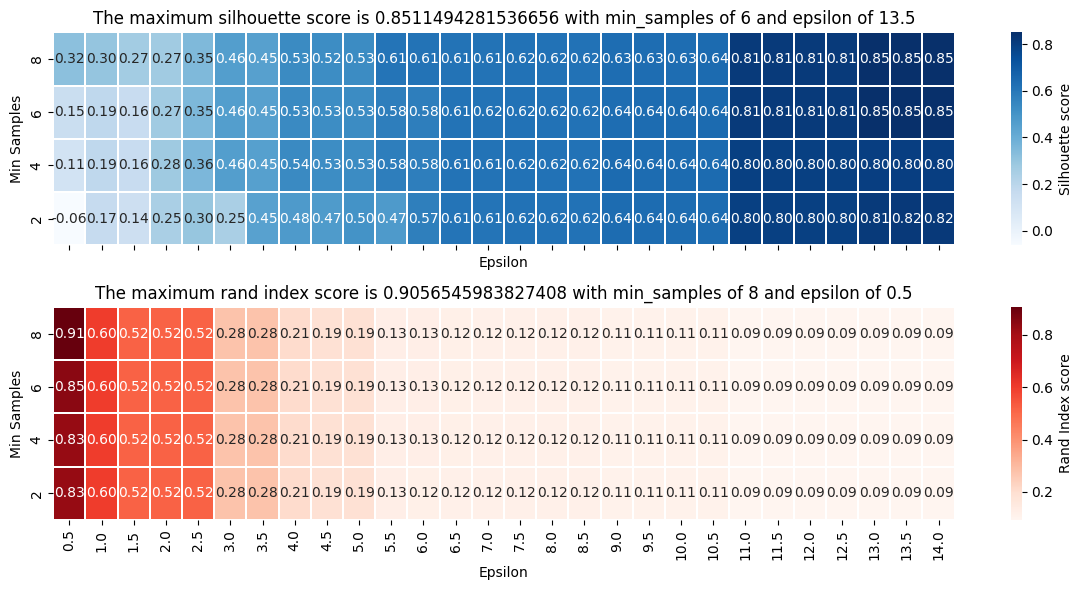

In [87]:
# Plot the silhouette score for the different values with a heatmap

fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
max_sil = gs_sil.max().max()
mins_max_sil = gs_sil.stack().idxmax()[0]
eps_max_sil = gs_sil.stack().idxmax()[1]
sns.heatmap(gs_sil, annot=True, fmt=".2f", cmap="Blues", ax=axes[0], cbar_kws={'label':'Silhouette score'}, linewidths=.005)
axes[0].invert_yaxis()
axes[0].set_title(f'The maximum silhouette score is {max_sil} with min_samples of {mins_max_sil} and epsilon of {eps_max_sil}')
axes[0].set_xlabel("Epsilon")
axes[0].set_ylabel("Min Samples")

max_ri = gs_ri.max().max()
mins_max_ri = gs_ri.stack().idxmax()[0]
eps_max_ri = gs_ri.stack().idxmax()[1]
sns.heatmap(gs_ri, annot=True, fmt=".2f", cmap="Reds", ax=axes[1], cbar_kws={'label':'Rand Index score'}, linewidths=.005)
axes[1].invert_yaxis()
axes[1].set_title(f'The maximum rand index score is {max_ri} with min_samples of {mins_max_ri} and epsilon of {eps_max_ri}')
axes[1].set_xlabel("Epsilon")
axes[1].set_ylabel("Min Samples")

plt.tight_layout()
plt.show()

In [109]:
# Report the results of the best combination based on silhouette and rand index
eps_best = 2.5
min_samples_best = 4
dbscan = DBSCAN(eps=eps_best, min_samples=min_samples_best )
cl_labels = dbscan.fit_predict(X) # Get clusters ID

# Unsupervised metric
silhouette  = silhouette_score(X, cl_labels)
# Supervised metrics
ri = rand_score(np.ravel(y), cl_labels)
ari = adjusted_rand_score(np.ravel(y), cl_labels)

# report number and size of each cluster
(unique, counts)=np.unique( cl_labels, return_counts=True)
best_n=len(unique)
print("Number of clusters (including noise): ", len(unique))
print("Size of each cluster: ", counts)
# report usupervised and supervised metric
print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')

Number of clusters (including noise):  92
Size of each cluster:  [  402 46584  2431     4    20    12   535   869   442     9   195    64
    22    65    36    26     4   103    16    14    20   113    18    13
   365     4     8    14    77    53     4   188    23    12     7    45
    20 10593    79    23    31    52     4    24     9    14     5     8
     8     5     8     7     7    13    10    13     6     5     4    21
     6     5     5     8   115     9     5    16     5    10    10     4
     4     9     4    12     6    14     9     6     4     4     7     7
     5     6     5     4     8     6    83    52]
Silhouette: 0.36
RI: 0.52
ARI: 0.12


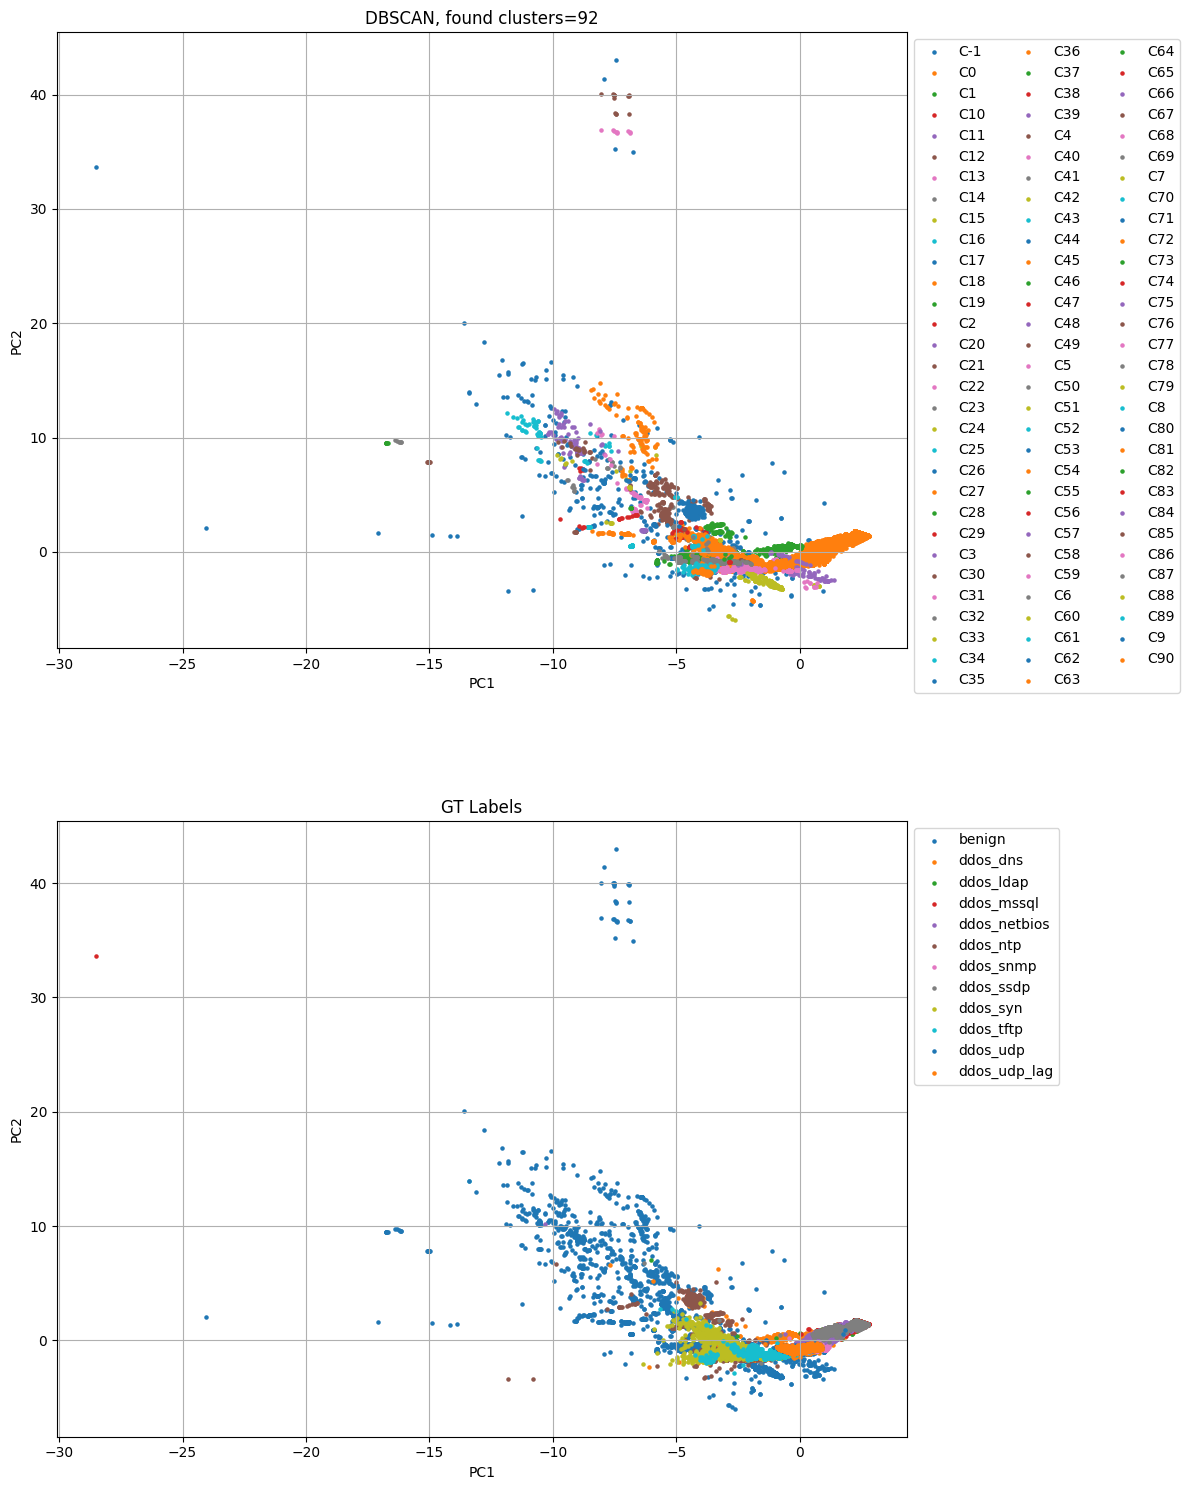

In [89]:
best_n=len(unique)

projection['cidBest_DBSCAN'] = [f'C{x}' for x in cl_labels]
projection['label'] = y.reshape(-1)

fig, axs = plt.subplots(2, 1, figsize=(12, 15))

for i in np.unique(projection.cidBest_DBSCAN):
    subdf = projection[projection.cidBest_DBSCAN==i]
    axs[0].scatter(subdf[0], subdf[1], label=i, s=5)
axs[0].grid()
lgnd = axs[0].legend(bbox_to_anchor=(1, 1), loc="upper left", ncol=best_n/25)

axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')
axs[0].set_title(f'DBSCAN, found clusters={best_n}')

for i in np.unique(y):
    subdf = projection[projection.label==i]
    axs[1].scatter(subdf[0], subdf[1], label=i, s=5)
axs[1].grid()
lgnd = axs[1].legend(bbox_to_anchor=(1, 1), loc="upper left")
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].set_title('GT Labels')


plt.tight_layout()
plt.show()

In [90]:
projection

,0,1,cid3_KM,cidBest_KM,label,cid3_GMM,cidBest_GMM,cidBest_DBSCAN
0,0.432364,-0.848388,C7,C1,ddos_dns,C5,C3,C0
1,-0.432156,0.192362,C0,C5,ddos_dns,C9,C20,C1
2,0.320787,-0.882778,C7,C1,ddos_dns,C5,C3,C0
3,0.037199,-0.674592,C7,C1,ddos_dns,C5,C3,C0
4,0.169545,-0.770669,C7,C1,ddos_dns,C5,C3,C0
...,...,...,...,...,...,...,...,...
64234,0.802795,-0.733508,C0,C0,ddos_udp_lag,C1,C1,C0
64235,-0.760490,-0.686655,C0,C23,ddos_udp_lag,C0,C11,C0
64236,0.727693,-0.788754,C0,C0,ddos_udp_lag,C1,C1,C0
64237,-0.854052,-0.656299,C0,C23,ddos_udp_lag,C0,C11,C0


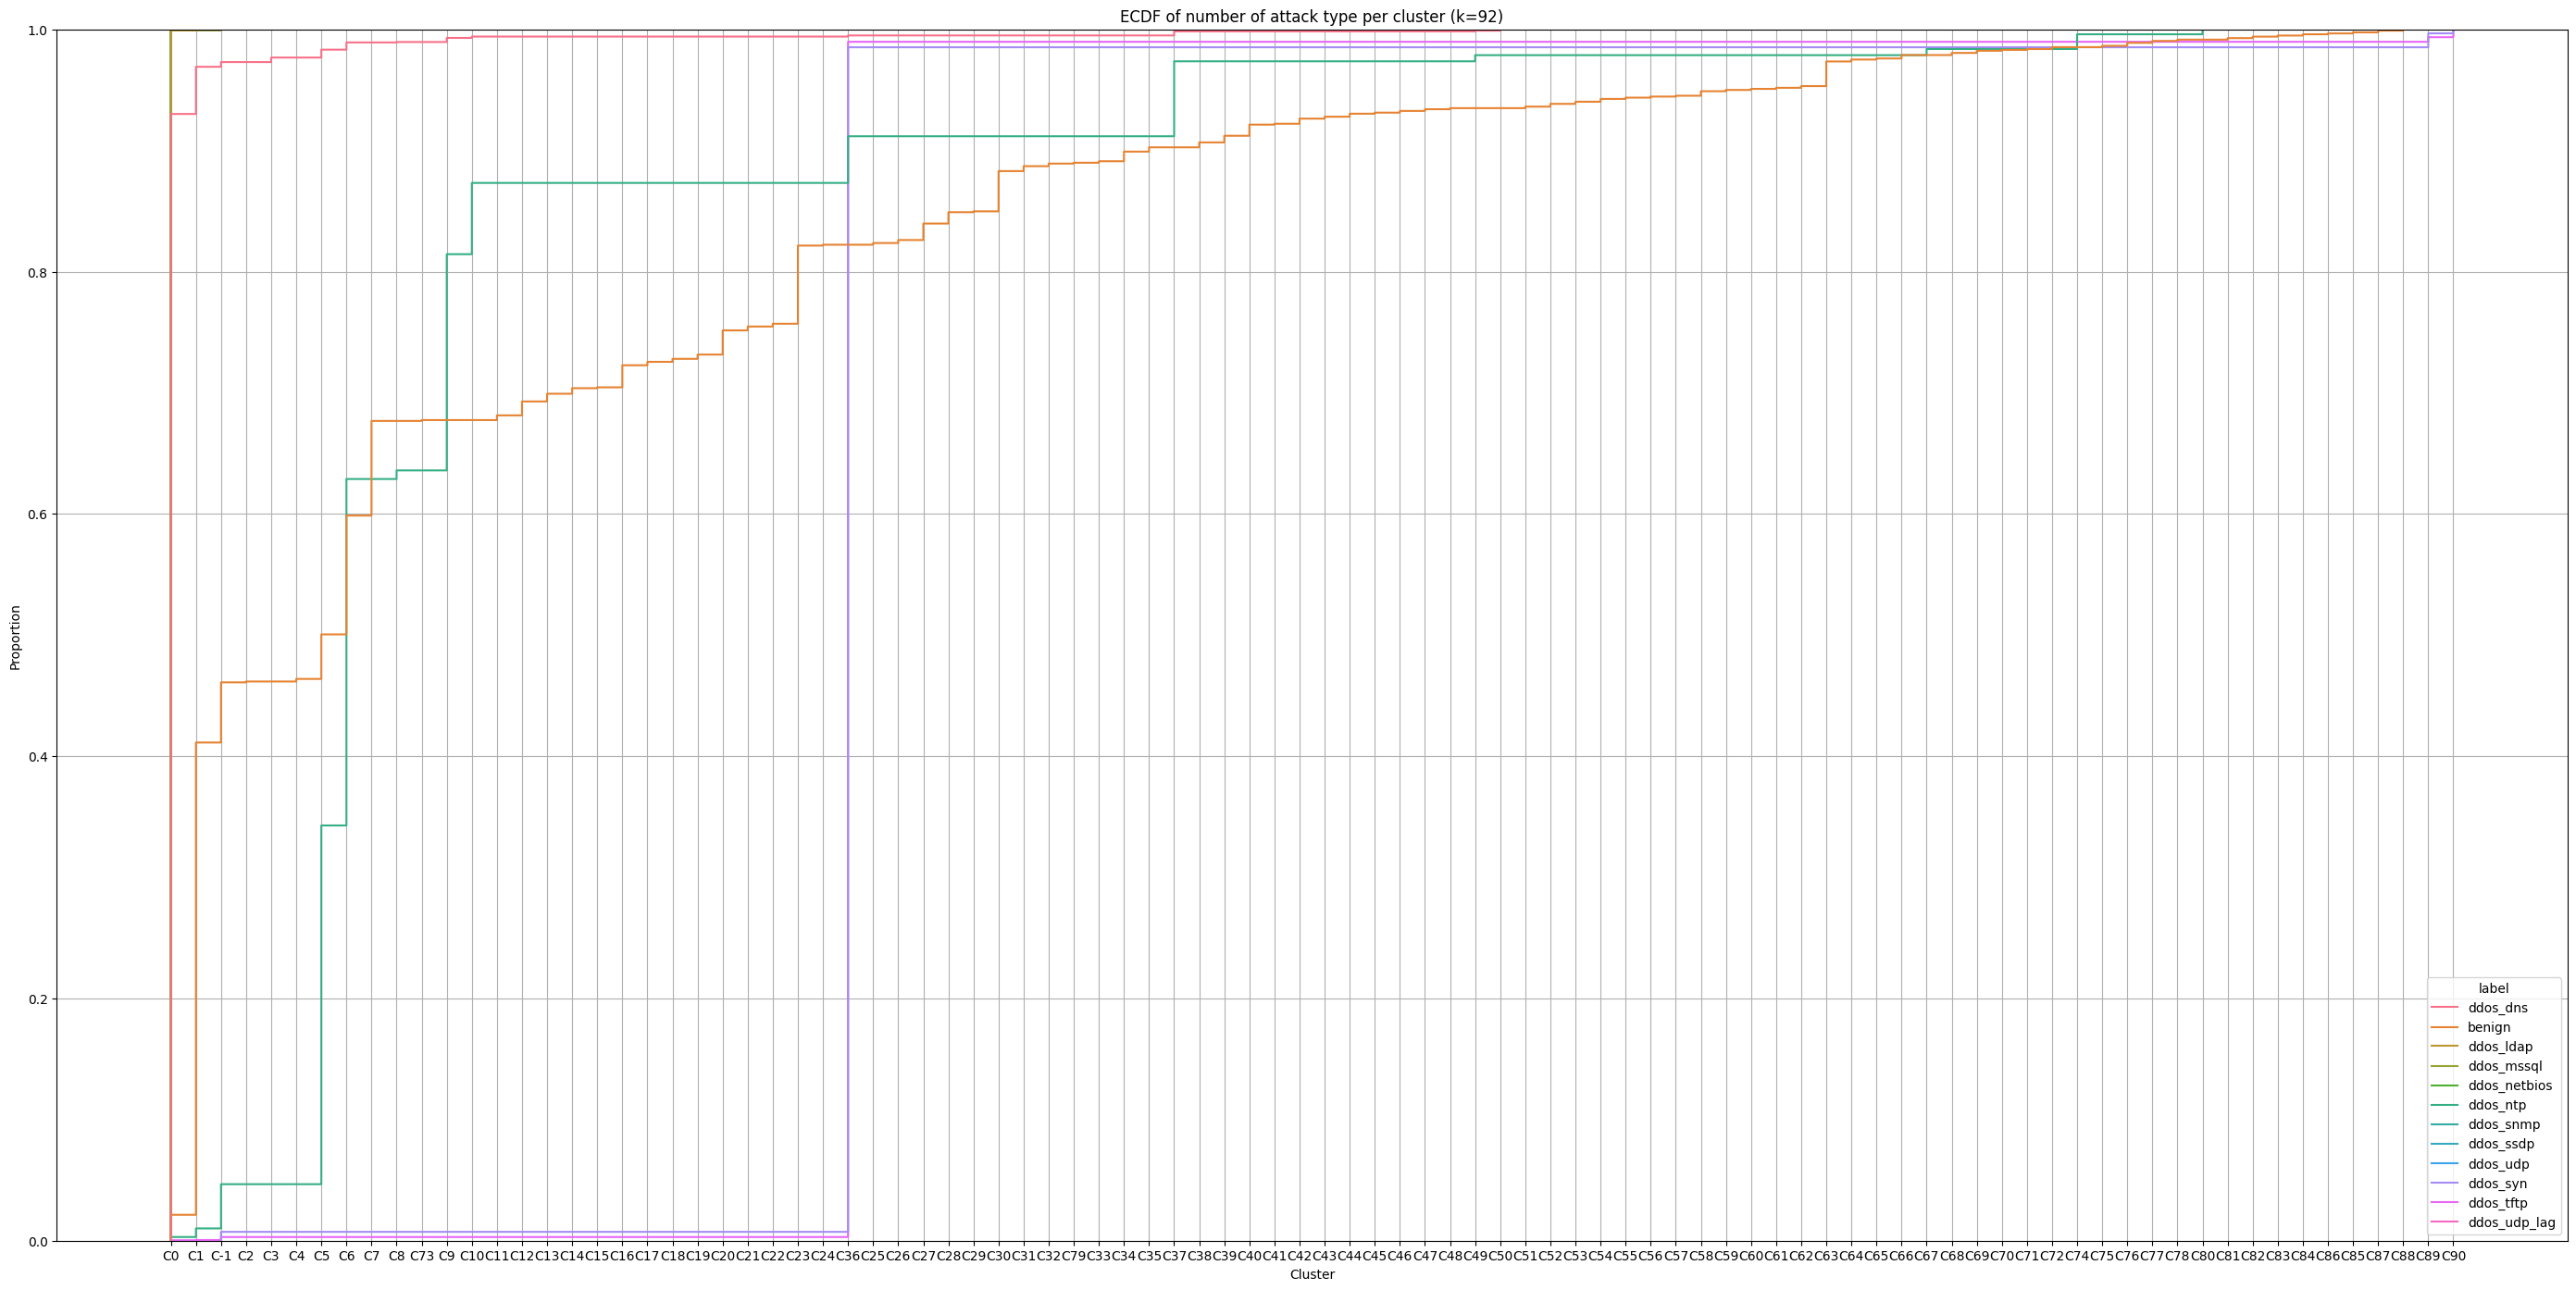

In [47]:
# ECDF of number of attack type per cluster (k=best_n)
plt.figure(figsize=(35, 17))
sns.ecdfplot(data=projection, x='cidBest', hue='label')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.title(f'ECDF of number of attack type per cluster (k={best_n})')
plt.grid()
plt.show()

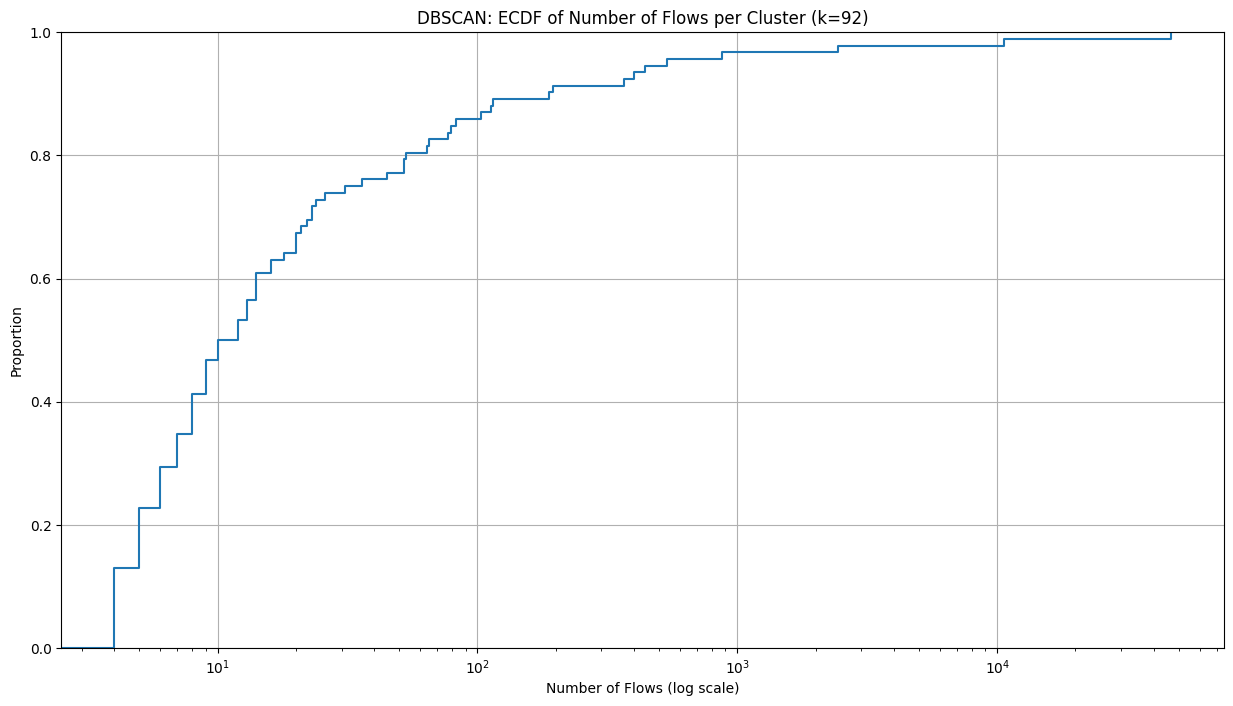

In [110]:
# ECDF of Number of Flows per Cluster
(unique, counts)=np.unique( cl_labels, return_counts=True)
cluster_sizes = counts
sorted_sizes = np.sort(cluster_sizes)

# ECDF Plot
plt.figure(figsize=(15, 8))
sns.ecdfplot(data=sorted_sizes)
plt.xscale('log')
plt.title(f'DBSCAN: ECDF of Number of Flows per Cluster (k={best_n})')
plt.xlabel('Number of Flows (log scale)')
plt.ylabel('Proportion')
plt.grid()
plt.show()

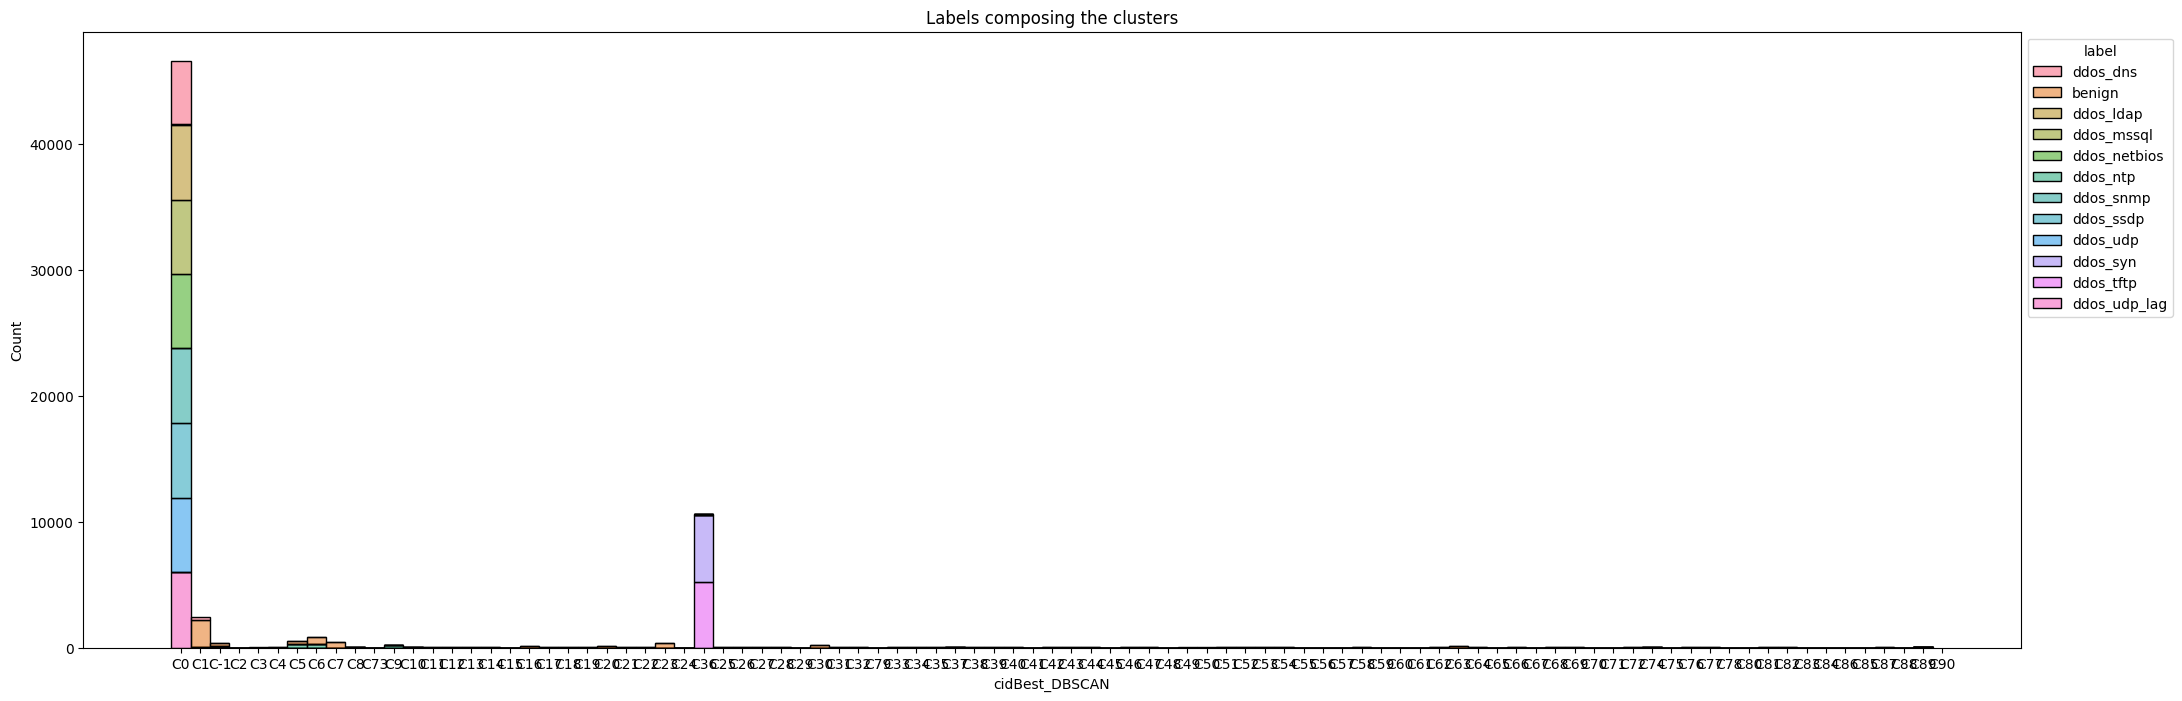

In [ ]:
plt.figure(figsize = (25, 8))

ax = sns.histplot(
    data = projection,
    palette="husl",
    x = "cidBest_DBSCAN", 
    hue = "label", 
    multiple="stack",
    # bins = 50,
    # binrange = (0,49),
    alpha = 0.6
)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Labels composing the clusters')
plt.show()

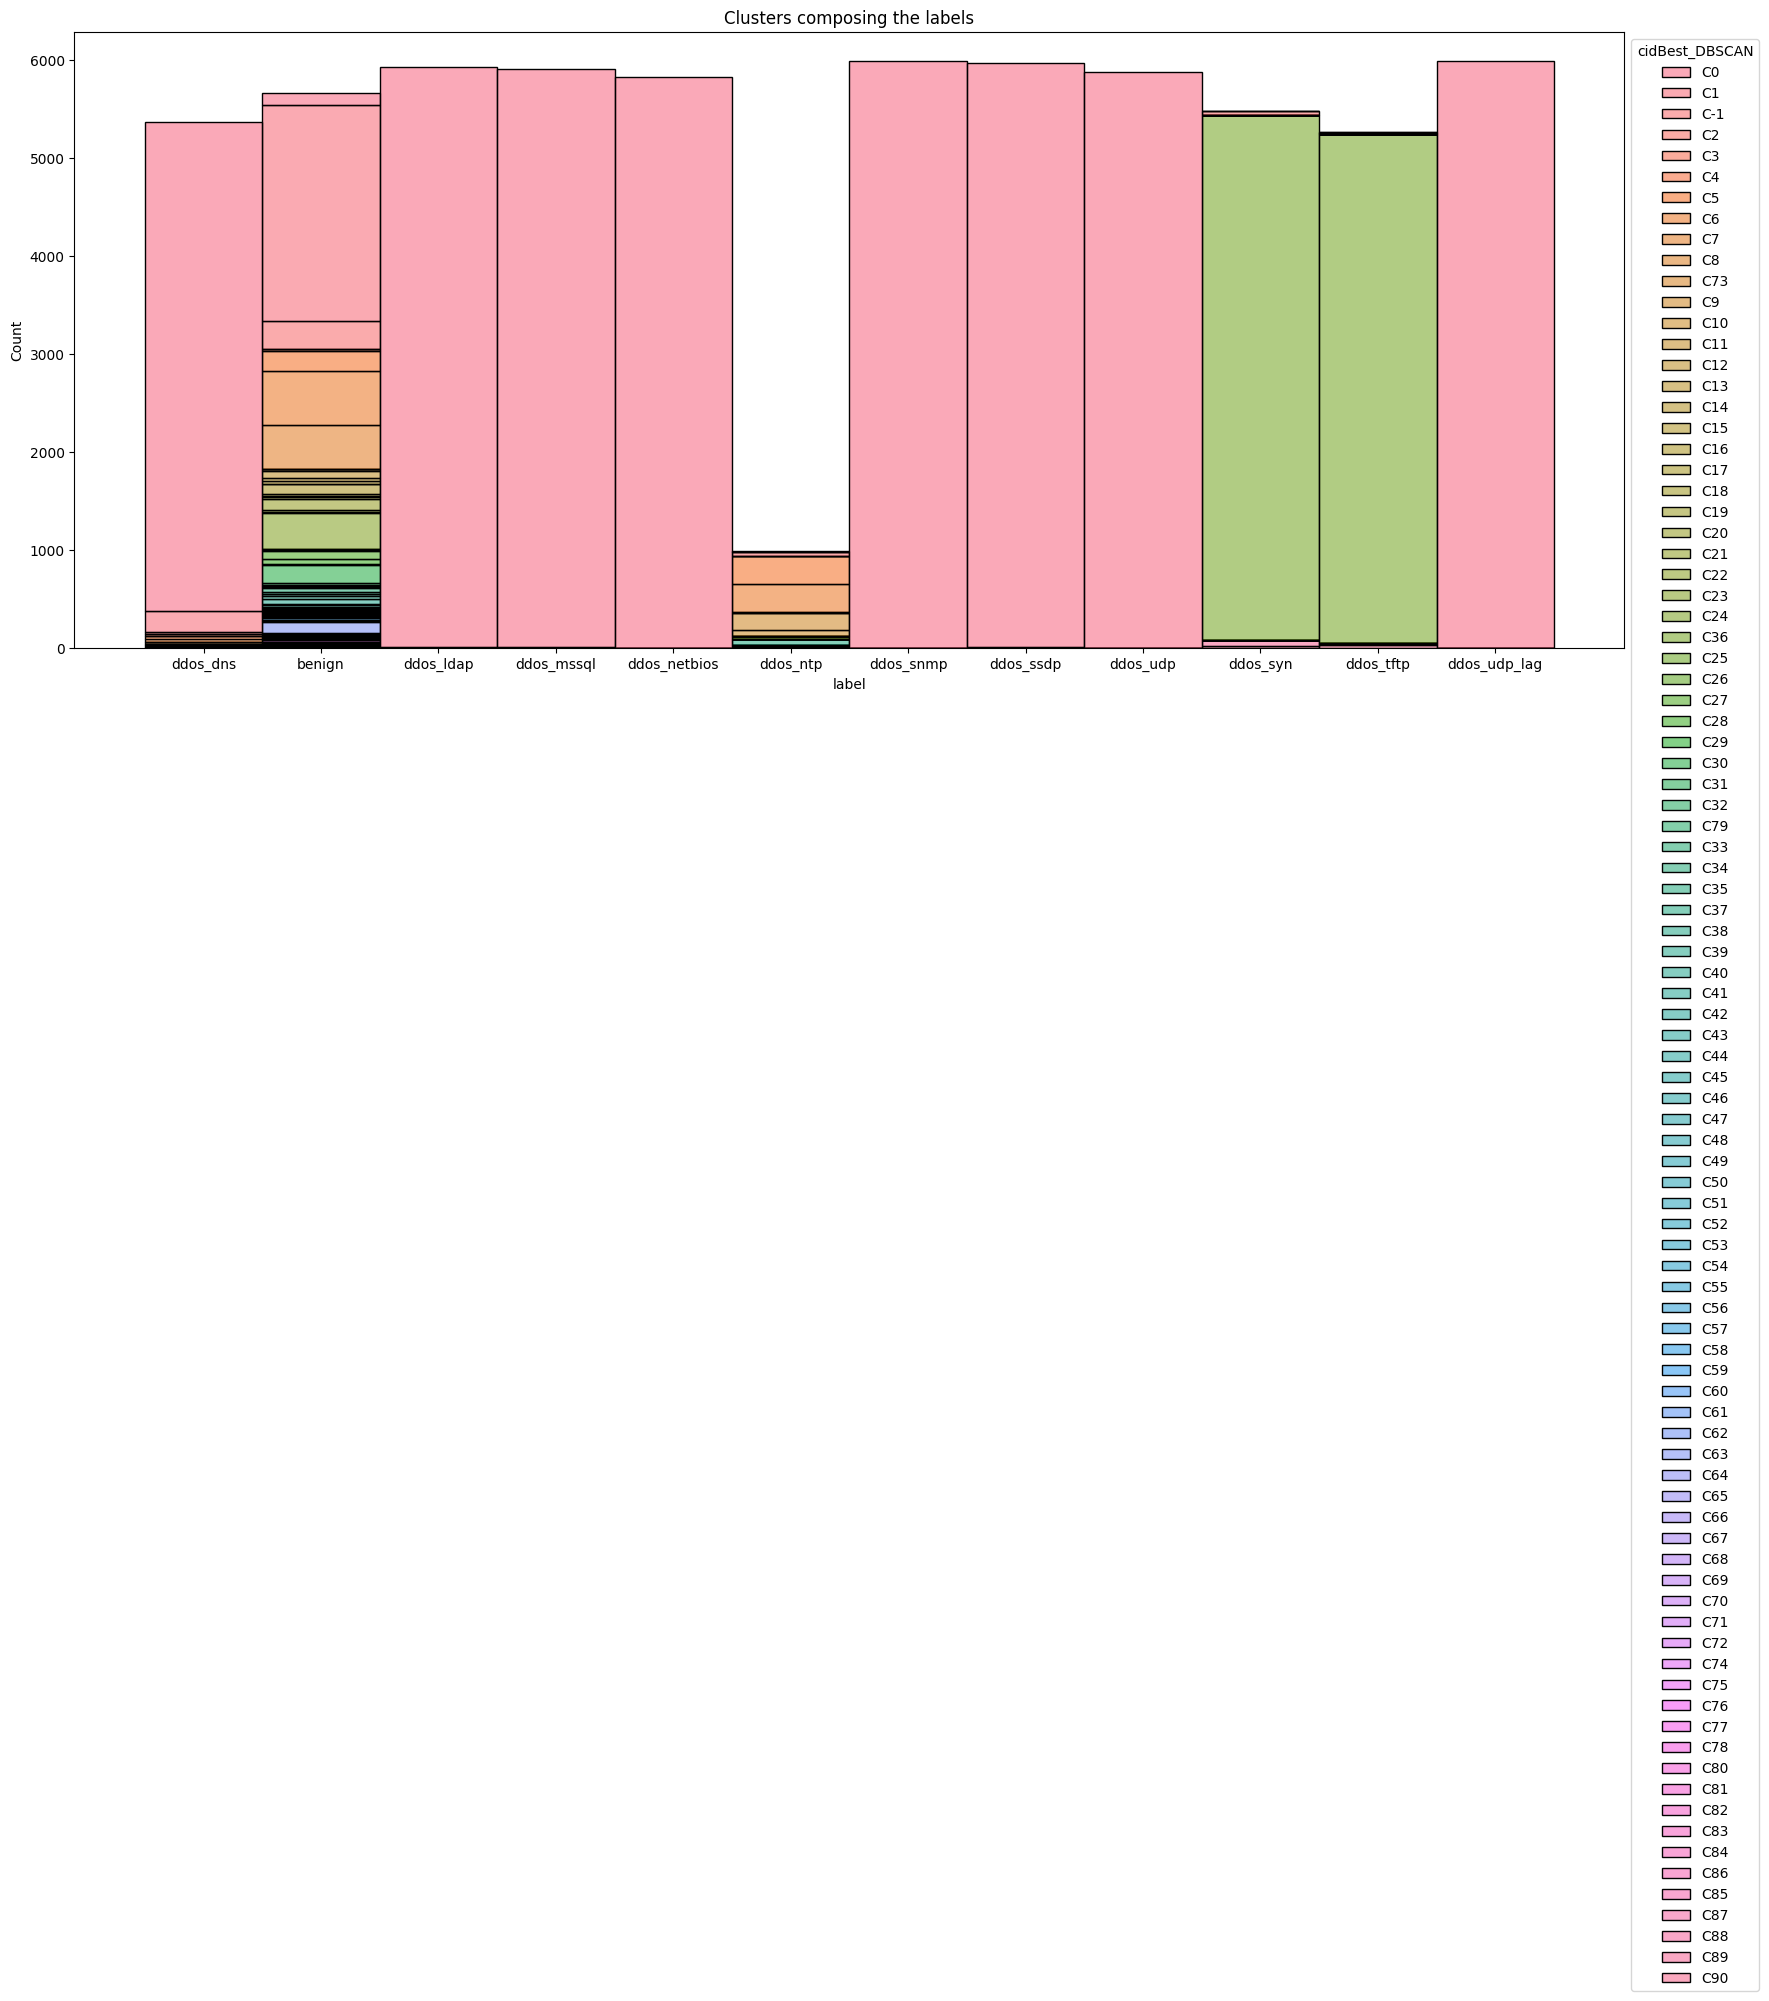

In [127]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(
    data = projection,
    palette="husl",
    x = "label",
    hue = "cidBest_DBSCAN",
    multiple="stack",
    # bins = 50,
    # binrange = (0,20),
    alpha = 0.6
)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.yscale("log")
plt.title('Clusters composing the labels')
plt.show()